In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from numpy import mean
from numpy import absolute
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import PolynomialFeatures


In [2]:
url = "https://www.the-numbers.com/movie/budgets/all"
response = requests.get(url)
page = response.text
soup = BeautifulSoup(page, "lxml")

In [3]:
page_num = ['',101,201,301,401,501, 601, 701, 801, 901, 1001, 1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901, 2001, 
            2101, 2201, 2301, 2401, 2501, 2601, 2701, 2801, 2901, 3001, 3101, 3201, 3301, 3401, 3501, 3601, 3701, 3801, 
            3901, 4001, 4101, 4201, 4301, 4401, 4501, 4601, 4701, 4801, 4901, 5001, 5101, 5201, 5301, 5401, 5501, 5601, 
            5701, 5801, 5901, 6001, 6101]
df_TheNumbers = pd.DataFrame()
for page in page_num:
    if page == '':
        url = "https://www.the-numbers.com/movie/budgets/all"
    else:
        url = "https://www.the-numbers.com/movie/budgets/all/"+str(page)
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page)
    table_tag = soup.find("table")
    tr_data = table_tag.find_all("tr")
    movie_table = pd.DataFrame()
    for j in range(len(tr_data)):
        if j==0:
            table_tag_data = tr_data[j].find_all('th')
        else:
            table_tag_data = tr_data[j].find_all('td')
        movie_data = []
        for i in table_tag_data:
            movie_data.append(i.getText())
        movie_table = movie_table.append(pd.DataFrame([movie_data]))
    movie_table.columns = movie_table.iloc[0]
    movie_table = movie_table[1:]
    df_TheNumbers = df_TheNumbers.append(movie_table)
df_TheNumbers = df_TheNumbers.reset_index(drop=True)

In [4]:
df_TheNumbers.head()

0      ReleaseDate                                        Movie  \
0  1  Apr 23, 2019                            Avengers: Endgame   
1  2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2  3  Apr 22, 2015                      Avengers: Age of Ultron   
3  4  Dec 16, 2015         Star Wars Ep. VII: The Force Awakens   
4  5  Apr 25, 2018                       Avengers: Infinity War   

0 ProductionBudget  DomesticGross   WorldwideGross  
0     $400,000,000   $858,373,000   $2,797,800,564  
1     $379,000,000   $241,071,802   $1,045,713,802  
2     $365,000,000   $459,005,868   $1,395,316,979  
3     $306,000,000   $936,662,225   $2,064,615,817  
4     $300,000,000   $678,815,482   $2,044,540,523

In [5]:
df_TheNumbers = df_TheNumbers[["ReleaseDate", "Movie", "ProductionBudget", "DomesticGross", "WorldwideGross"]]

In [6]:
df_TheNumbers

0      ReleaseDate                                        Movie  \
0     Apr 23, 2019                            Avengers: Endgame   
1     May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2     Apr 22, 2015                      Avengers: Age of Ultron   
3     Dec 16, 2015         Star Wars Ep. VII: The Force Awakens   
4     Apr 25, 2018                       Avengers: Infinity War   
...            ...                                          ...   
6195       Unknown                              The Mongol King   
6196       Unknown                                       Red 11   
6197   Apr 2, 1999                                    Following   
6198  Jul 13, 2005                Return to the Land of Wonders   
6199  Sep 29, 2015                         A Plague So Pleasant   

0    ProductionBudget  DomesticGross   WorldwideGross  
0        $400,000,000   $858,373,000   $2,797,800,564  
1        $379,000,000   $241,071,802   $1,045,713,802  
2        $365,000,000   $459,005,868   $1,395,316,979  
3        $306,000,000   $936,662,225   $2,064,615,817  
4        $300,000,000   $678,815,482   $2,044,540,523  
...               ...            ...              ...  
6195           $7,000           $900             $900  
6196           $7,000             $0               $0  
6197           $6,000        $48,482         $240,495  
6198           $5,000         $1,338           $1,338  
6199           $1,400             $0               $0  

[6200 rows x 5 columns]

In [7]:
df_TheNumbers.loc[df_TheNumbers['ReleaseDate'] == 'Unknown']

0    ReleaseDate                             Movie ProductionBudget  \
245      Unknown                    Desert Warrior     $140,000,000   
805      Unknown                                 b      $70,000,000   
1284     Unknown            Hannibal the Conqueror      $50,000,000   
1455     Unknown  Les BronzÃ©s 3: amis pour la vie      $42,000,000   
1643     Unknown                  Down Under Cover      $40,000,000   
...          ...                               ...              ...   
6174     Unknown                          Flywheel          $20,000   
6180     Unknown              Stories of Our Lives          $15,000   
6183     Unknown                       Tin Can Man          $12,000   
6195     Unknown                   The Mongol King           $7,000   
6196     Unknown                            Red 11           $7,000   

0    DomesticGross WorldwideGross  
245             $0             $0  
805             $0             $0  
1284            $0             $0  
1455            $0    $83,833,602  
1643            $0             $0  
...            ...            ...  
6174            $0             $0  
6180            $0             $0  
6183            $0             $0  
6195          $900           $900  
6196            $0             $0  

[113 rows x 5 columns]

In [8]:
df_TheNumbers = df_TheNumbers.drop(df_TheNumbers.index[244])
df_TheNumbers = df_TheNumbers.drop(df_TheNumbers.index[802])
df_TheNumbers

0      ReleaseDate                                        Movie  \
0     Apr 23, 2019                            Avengers: Endgame   
1     May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2     Apr 22, 2015                      Avengers: Age of Ultron   
3     Dec 16, 2015         Star Wars Ep. VII: The Force Awakens   
4     Apr 25, 2018                       Avengers: Infinity War   
...            ...                                          ...   
6195       Unknown                              The Mongol King   
6196       Unknown                                       Red 11   
6197   Apr 2, 1999                                    Following   
6198  Jul 13, 2005                Return to the Land of Wonders   
6199  Sep 29, 2015                         A Plague So Pleasant   

0    ProductionBudget  DomesticGross   WorldwideGross  
0        $400,000,000   $858,373,000   $2,797,800,564  
1        $379,000,000   $241,071,802   $1,045,713,802  
2        $365,000,000   $459,005,868   $1,395,316,979  
3        $306,000,000   $936,662,225   $2,064,615,817  
4        $300,000,000   $678,815,482   $2,044,540,523  
...               ...            ...              ...  
6195           $7,000           $900             $900  
6196           $7,000             $0               $0  
6197           $6,000        $48,482         $240,495  
6198           $5,000         $1,338           $1,338  
6199           $1,400             $0               $0  

[6198 rows x 5 columns]

In [9]:
df_TheNumbers['ProductionBudget'] = df_TheNumbers['ProductionBudget'].str.replace('$','')
df_TheNumbers['DomesticGross'] = df_TheNumbers['DomesticGross'].str.replace('$','')
df_TheNumbers['WorldwideGross'] = df_TheNumbers['WorldwideGross'].str.replace('$','')

<ipython-input-9-13d4b2c0c241>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_TheNumbers['ProductionBudget'] = df_TheNumbers['ProductionBudget'].str.replace('$','')
<ipython-input-9-13d4b2c0c241>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_TheNumbers['DomesticGross'] = df_TheNumbers['DomesticGross'].str.replace('$','')
<ipython-input-9-13d4b2c0c241>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_TheNumbers['WorldwideGross'] = df_TheNumbers['WorldwideGross'].str.replace('$','')


In [10]:
df_TheNumbers['ProductionBudget'] = df_TheNumbers['ProductionBudget'].str.replace(',','')
df_TheNumbers['DomesticGross'] = df_TheNumbers['DomesticGross'].str.replace(',','')
df_TheNumbers['WorldwideGross'] = df_TheNumbers['WorldwideGross'].str.replace(',','')

In [11]:
df_TheNumbers

0      ReleaseDate                                        Movie  \
0     Apr 23, 2019                            Avengers: Endgame   
1     May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2     Apr 22, 2015                      Avengers: Age of Ultron   
3     Dec 16, 2015         Star Wars Ep. VII: The Force Awakens   
4     Apr 25, 2018                       Avengers: Infinity War   
...            ...                                          ...   
6195       Unknown                              The Mongol King   
6196       Unknown                                       Red 11   
6197   Apr 2, 1999                                    Following   
6198  Jul 13, 2005                Return to the Land of Wonders   
6199  Sep 29, 2015                         A Plague So Pleasant   

0    ProductionBudget DomesticGross WorldwideGross  
0           400000000     858373000     2797800564  
1           379000000     241071802     1045713802  
2           365000000     459005868     1395316979  
3           306000000     936662225     2064615817  
4           300000000     678815482     2044540523  
...               ...           ...            ...  
6195             7000           900            900  
6196             7000             0              0  
6197             6000         48482         240495  
6198             5000          1338           1338  
6199             1400             0              0  

[6198 rows x 5 columns]

In [12]:
df_TheNumbers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6198 entries, 0 to 6199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ReleaseDate       6198 non-null   object
 1   Movie             6198 non-null   object
 2   ProductionBudget  6198 non-null   object
 3   DomesticGross     6198 non-null   object
 4   WorldwideGross    6198 non-null   object
dtypes: object(5)
memory usage: 290.5+ KB


In [13]:
titles = []
years = []
duration = []
imdb_ratings = []
metascores = []
votes = []
us_gross = []
genre = [] 
certificate = [] 
director = []
stars = []
ages = []

In [14]:
pages = np.arange(1, 3001, 50)

for page in pages:
    page = requests.get('https://www.imdb.com/search/title/?title_type=feature&num_votes=50000,&sort=user_rating,desc&start=' + str(page) + '&ref_=adv_nxt')
    soup = BeautifulSoup(page.text, 'html.parser')
    
    movie_div = soup.findAll('div', attrs = {'class': 'lister-item mode-advanced'})
    
    
    
    for container in movie_div:
       
        name = container.h3.a.text
        titles.append(name)
        
      
        year = container.h3.find('span', class_='lister-item-year text-muted unbold').text.replace('(', '').replace(')', '')
        years.append(year)
        
        runtime = container.find('span', class_='runtime').text.replace('min', '') if container.p.find('span', class_='runtime') else '-'
        duration.append(runtime)
        
       
        cert = container.find('span', class_='certificate').text if container.p.find('span', class_='certificate') else '-'
        certificate.append(cert)
        
       
        gen = container.find('span', class_='genre').text.strip() if container.p.find('span', class_='genre') else '-'
        genre.append(gen)
        
      
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
        
       
        m_score = container.find('span', class_='metascore').text if container.find('span', class_='metascore') else '-'
        metascores.append(m_score)
        
        age = container.p.find('span', class_ = 'certificate')
        
        #G, 0-13 13-18 -X
        
        if(age is None):
            ages.append(-1)
            
        else:
            age = age.text
            if(age.lower()=='7+' or age.lower()=='7a'or age.lower()=='10a' or age.lower()=='pg'):
                ages.append('0-13')
            elif(str(age).lower()=='pg-13' or str(age).lower()=='15a' 
               or str(age).lower()=='16+' or str(age).lower()=='13+' 
               or str(age).lower()=='15+' or str(age).lower()=='13a'):
                ages.append('13-18')

            elif(str(age).lower()=='18+' or age.lower()=='m'):
                ages.append('18+')

            elif(str(age).lower()=='g'):
                ages.append('G') #General audience

            elif(str(age).lower()=='R'):
                ages.append('X') #Sexual content
                
            else:
                ages.append(-1)
                
        cast = container.find('p', class_= '')
        cast = cast.text.replace('\n', '').split('|')
        cast = [k.strip() for k in cast]
        if len(cast)==2:
            cast = [cast[i] for i,j in enumerate (['Director:', 'Stars:'])]
            director.append(cast[0][9:])
            stars.append(cast[1][6:])
        elif len(cast)==1:
            director.append(cast[9:])
            stars.append(np.nan)
        
        try:  
            nv = container.find_all('span', attrs={'name':'nv'})
            vote = nv[0].text
            votes.append(vote)
            grosses = nv[1].text if len(nv) > 1 else '-'
            us_gross.append(grosses)
        except:
            votes.append(np.nan)
            us_gross.append(np.nan)

16+
13+
18+
10+
16+
18+
15+
16+
18+
18+
13+
R
18+
13+
7+
15+
13+
13+
16+
18+
18+
7+
15+
15+
13A
18+
G
13+
18+
13+
13+
18+
G
7+
13+
18+
16+
18+
18+
16+
18+
18+
18+
G
15+
15+
13+
7+
13+
G
G
G
PG-13
13+
18+
7+
7+
7+
15A
13+
7+
18+
13A
PG-13
13+
G
R
18+
13+
13+
16+
18+
18+
18+
18+
15+
16+
15+
7+
15+
10+
15+
16+
13+
18+
18+
7+
PG
G
13+
15+
18+
18+
18+
15A
18+
7+
15+
13+
18+
G
13A
13A
18+
G
7A
7+
16+
7+
7+
R
13+
13+
PG
18+
G
15+
13+
G
13+
7+
7+
13+
18+
18+
15+
7+
18+
18+
18+
13+
G
13+
7+
15+
18+
16+
7+
15+
G
15+
15+
13+
18+
15+
15+
13A
15+
7+
G
13+
18+
15+
G
15+
13+
10A
15+
PG
15A
15+
PG-13
16+
13+
16+
PG-13
7+
7+
18+
15+
7+
16+
15+
G
18+
7A
13+
18+
7+
PG
15+
R
R
7+
R
18+
PG
18+
15+
16+
13+
15+
PG-13
16+
G
G
7A
15+
13A
7+
18+
18+
13A
13A
16+
18+
15+
7A
18+
7+
13+
15+
13+
G
7+
G
13+
13A
7A
7A
R
18+
7+
13+
15+
15+
15+
G
G
15+
13A
R
PG-13
7+
15+
R
7+
G
15+
13+
15+
13+
R
18+
PG-13
18+
G
13A
18+
R
13A
7+
R
13+
G
G
R
13+
18+
R
10A
R
G
13+
18+
13+
G
7+
16+
15+
13+
7A
R
15+
15+
7+
16+
7A
15+
18+
13+

PG-13
R
PG-13
PG
18+
PG
13A
13+
13A
18+
13+
PG-13
PG-13
R
PG
13+
7A
15+
G
7A
18+
16+
16+
18+
18+
18+
R
15+
18+
7A
13A
13+
13+
18+
13+
13+
7+
7A
18+
15+
7A
13+
15+
15+
15+
PG-13
G
13+
18+
13A
R
16+
15+
7+
R
15+
15+
PG
7+
7A
13+
13+
15+
18+
13+
13+
R
13A
13+
18+
13+
13+
13A
R
13+
R
18+
R
PG-13
15+
13+
R
18+
13+
R
15+
18+
PG
R
18+
R
7+
13+
PG
7+
15+
PG-13
R
R
PG
PG-13
PG-13
13+
PG-13
18+
PG-13
PG-13
R
PG-13
PG-13
PG-13
PG-13
15+
PG-13
R
G
PG-13
15+
18+
R
R
R
13A
13+
PG-13
18+
13A
PG-13
PG-13
R
18+
15+
18+
7+
15+
PG-13
7+
18+
16+
15+
13+
15+
R
13+
15+
15+
15+
PG-13
PG-13
13+
13+
R
R
13A
13+
15+
7+
7A
R
18+
13A
13A
16+
18+
18+
15A
18+
PG-13
18+
15+
R
PG-13
PG-13
15+
13+
13+
13+
16+
13+
R
15+
15+
R
R
13A
R
PG-13
G
18+
18+
13A
PG-13
PG-13
PG-13
13A
15A
R
15+
18+
18+
PG-13
16+
18+
R
18+
PG
R
13+
13A
PG-13
PG-13
18+
R
R
16+
PG
PG
13A
R
PG-13
13+
18+
18+
13+
R
18+
G
15+
PG-13
18+
PG-13
G
PG-13
PG-13
PG-13
13+
PG
R
R
PG-13
PG-13
13+
PG-13
15+
7+
R
13+
PG-13
PG-13
PG-13
PG-13
13+
PG-13
18+
PG-13
R

In [15]:
print(len(titles))
print(len(years))
print(len(duration))
print(len(imdb_ratings))
print(len(metascores))
print(len(votes))
print(len(us_gross))
print(len(certificate))
print(len(genre))



3000
3000
3000
3000
3000
3000
3000
3000
3000


In [16]:
movies = pd.DataFrame({'Movie':titles,
                       'year':years,
                       'time_minute':duration,
                       'imdb_rating':imdb_ratings,
                       'metascore':metascores,
                       'vote':votes,
                       'gross_earning':us_gross,
                       'age_group': certificate,
                       'genres': genre,
                       'director':director,
                       'cast':stars,
                       'age':ages})

movies.head()

Movie  year time_minute  imdb_rating    metascore  \
0                  Jai Bhim  2021        164           9.4            -   
1  The Shawshank Redemption  1994        142           9.3   80           
2             The Godfather  1972        175           9.2  100           
3           Soorarai Pottru  2020        153           9.1            -   
4   Spider-Man: No Way Home  2021        148           9.0   71           

        vote gross_earning age_group                      genres  \
0    159,877             -       16+                Crime, Drama   
1  2,508,844       $28.34M       13+                       Drama   
2  1,728,807      $134.97M       18+                Crime, Drama   
3    104,842             -         -                       Drama   
4    215,694             -       10+  Action, Adventure, Fantasy   

               director                                               cast  \
0         T.J. Gnanavel  Suriya, Lijo Mol Jose, Manikandan, Rajisha Vij...   
1        Frank Darabont  Tim Robbins, Morgan Freeman, Bob Gunton, Willi...   
2  Francis Ford Coppola  Marlon Brando, Al Pacino, James Caan, Diane Ke...   
3         Sudha Kongara   Suriya, Paresh Rawal, Aparna Balamurali, Urvashi   
4             Jon Watts  Tom Holland, Zendaya, Benedict Cumberbatch, Ja...   

     age  
0  13-18  
1  13-18  
2    18+  
3     -1  
4     -1

In [17]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie          3000 non-null   object 
 1   year           3000 non-null   object 
 2   time_minute    3000 non-null   object 
 3   imdb_rating    3000 non-null   float64
 4   metascore      3000 non-null   object 
 5   vote           3000 non-null   object 
 6   gross_earning  3000 non-null   object 
 7   age_group      3000 non-null   object 
 8   genres         3000 non-null   object 
 9   director       3000 non-null   object 
 10  cast           3000 non-null   object 
 11  age            3000 non-null   object 
dtypes: float64(1), object(11)
memory usage: 281.4+ KB


In [18]:
movies = movies.replace(-1,np.nan)

In [19]:
import pickle
import numpy as np
import pandas as pd
filename = 'movie_df'
outfile = open(filename,'wb')
pickle.dump(movies,outfile)
outfile.close()


In [20]:
df = pd.merge(movies, df_TheNumbers, how='inner', on = 'Movie')


In [21]:
df.head()

Movie  year time_minute  imdb_rating    metascore  \
0  The Shawshank Redemption  1994        142           9.3   80           
1             The Godfather  1972        175           9.2  100           
2   Spider-Man: No Way Home  2021        148           9.0   71           
3           The Dark Knight  2008        152           9.0   84           
4    The Godfather: Part II  1974        202           9.0   90           

        vote gross_earning age_group                      genres  \
0  2,508,844       $28.34M       13+                       Drama   
1  1,728,807      $134.97M       18+                Crime, Drama   
2    215,694             -       10+  Action, Adventure, Fantasy   
3  2,458,791      $534.86M       16+        Action, Crime, Drama   
4  1,199,671       $57.30M       18+                Crime, Drama   

               director                                               cast  \
0        Frank Darabont  Tim Robbins, Morgan Freeman, Bob Gunton, Willi...   
1  Francis Ford Coppola  Marlon Brando, Al Pacino, James Caan, Diane Ke...   
2             Jon Watts  Tom Holland, Zendaya, Benedict Cumberbatch, Ja...   
3     Christopher Nolan  Christian Bale, Heath Ledger, Aaron Eckhart, M...   
4  Francis Ford Coppola  Al Pacino, Robert De Niro, Robert Duvall, Dian...   

     age   ReleaseDate ProductionBudget DomesticGross WorldwideGross  
0  13-18  Sep 23, 1994         25000000      28241469       28419106  
1    18+  Mar 15, 1972          7000000     134966411      268500000  
2    NaN  Dec 14, 2021        200000000     297276887      637644359  
3  13-18  Jul 11, 2008        185000000     533720947      998615789  
4    18+  Dec 11, 1974         13000000      57300000       57300000

In [22]:
from datetime import datetime as dt
def convertDate(strdate):
    try:
        x= dt.strptime(strdate,"%b %d, %Y")
        return x
    except:
        return np.nan

In [23]:
df['ReleaseDate'] = df['ReleaseDate'].apply(lambda x : convertDate(x))

In [24]:
df = df.replace('-',np.nan)

In [25]:
df['ReleaseDate'].isna().sum()
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 2208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Movie             1663 non-null   object        
 1   year              1663 non-null   object        
 2   time_minute       1663 non-null   object        
 3   imdb_rating       1663 non-null   float64       
 4   metascore         1663 non-null   object        
 5   vote              1663 non-null   object        
 6   gross_earning     1663 non-null   object        
 7   age_group         1663 non-null   object        
 8   genres            1663 non-null   object        
 9   director          1663 non-null   object        
 10  cast              1663 non-null   object        
 11  age               1663 non-null   object        
 12  ReleaseDate       1663 non-null   datetime64[ns]
 13  ProductionBudget  1663 non-null   object        
 14  DomesticGross     1663 n

In [26]:
df['Quarter'] = pd.PeriodIndex(df.ReleaseDate, freq='Q')
df['Quarter'] = df['Quarter'].astype('string')

def getQuarter(s):
    return s[4:]

df['QuarterInYear'] = df['Quarter'].apply(lambda x : getQuarter(x))
df = df.drop('Quarter', 1)
df.head()

Movie  year time_minute  imdb_rating    metascore  \
0  The Shawshank Redemption  1994        142           9.3   80           
1             The Godfather  1972        175           9.2  100           
3           The Dark Knight  2008        152           9.0   84           
4    The Godfather: Part II  1974        202           9.0   90           
5              12 Angry Men  1957         96           9.0   96           

        vote gross_earning age_group                genres  \
0  2,508,844       $28.34M       13+                 Drama   
1  1,728,807      $134.97M       18+          Crime, Drama   
3  2,458,791      $534.86M       16+  Action, Crime, Drama   
4  1,199,671       $57.30M       18+          Crime, Drama   
5    740,997        $4.36M       15+          Crime, Drama   

               director                                               cast  \
0        Frank Darabont  Tim Robbins, Morgan Freeman, Bob Gunton, Willi...   
1  Francis Ford Coppola  Marlon Brando, Al Pacino, James Caan, Diane Ke...   
3     Christopher Nolan  Christian Bale, Heath Ledger, Aaron Eckhart, M...   
4  Francis Ford Coppola  Al Pacino, Robert De Niro, Robert Duvall, Dian...   
5          Sidney Lumet  Henry Fonda, Lee J. Cobb, Martin Balsam, John ...   

     age ReleaseDate ProductionBudget DomesticGross WorldwideGross  \
0  13-18  1994-09-23         25000000      28241469       28419106   
1    18+  1972-03-15          7000000     134966411      268500000   
3  13-18  2008-07-11        185000000     533720947      998615789   
4    18+  1974-12-11         13000000      57300000       57300000   
5  13-18  1957-04-13           340000             0            379   

  QuarterInYear  
0            Q3  
1            Q1  
3            Q3  
4            Q4  
5            Q2

In [27]:
df = df.drop('DomesticGross', 1)
df = df.drop('gross_earning', 1)
df=df.drop('age_group',1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 2208
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Movie             1663 non-null   object        
 1   year              1663 non-null   object        
 2   time_minute       1663 non-null   object        
 3   imdb_rating       1663 non-null   float64       
 4   metascore         1663 non-null   object        
 5   vote              1663 non-null   object        
 6   genres            1663 non-null   object        
 7   director          1663 non-null   object        
 8   cast              1663 non-null   object        
 9   age               1663 non-null   object        
 10  ReleaseDate       1663 non-null   datetime64[ns]
 11  ProductionBudget  1663 non-null   object        
 12  WorldwideGross    1663 non-null   object        
 13  QuarterInYear     1663 non-null   object        
dtypes: datetime64[ns](1), fl

In [29]:
df['time_minute'] = df['time_minute'].astype('int')
df['imdb_rating'] = df['imdb_rating'].astype('float')
df['metascore'] = df['metascore'].astype('int')
df['vote'] = df['vote'].astype('str')
df['vote'] = df['vote'].apply(lambda x : x.replace(',', ''))
df['vote'] = df['vote'].astype('int')
df['ProductionBudget'] = df['ProductionBudget'].astype('int')
df['WorldwideGross'] = df['WorldwideGross'].astype('float')
df['cast'] = df['cast'].astype('str')
df['director'] = df['director'].astype('str')
df['Movie'] = df['Movie'].astype('str')
df['genres'] = df['genres'].astype('str')
df['QuarterInYear'] = df['QuarterInYear'].astype('str')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 2208
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Movie             1663 non-null   object        
 1   year              1663 non-null   object        
 2   time_minute       1663 non-null   int32         
 3   imdb_rating       1663 non-null   float64       
 4   metascore         1663 non-null   int32         
 5   vote              1663 non-null   int32         
 6   genres            1663 non-null   object        
 7   director          1663 non-null   object        
 8   cast              1663 non-null   object        
 9   age               1663 non-null   object        
 10  ReleaseDate       1663 non-null   datetime64[ns]
 11  ProductionBudget  1663 non-null   int32         
 12  WorldwideGross    1663 non-null   float64       
 13  QuarterInYear     1663 non-null   object        
dtypes: datetime64[ns](1), fl

In [31]:
genres_dummy_df = pd.Series(df["genres"]).str.get_dummies(sep=", ")
genres_dummy_df.sum(axis=0).sort_values(axis=0, ascending=False)

Drama        845
Action       563
Comedy       497
Adventure    484
Thriller     305
Crime        292
Romance      225
Sci-Fi       212
Mystery      171
Horror       155
Biography    146
Fantasy      142
Animation    140
Family        92
History       58
Sport         44
Music         32
War           25
Musical       16
Western       11
Film-Noir      1
dtype: int64

In [32]:
df.corr()

time_minute  imdb_rating  metascore      vote  \
time_minute          1.000000     0.343217   0.183860  0.319625   
imdb_rating          0.343217     1.000000   0.666674  0.601415   
metascore            0.183860     0.666674   1.000000  0.331266   
vote                 0.319625     0.601415   0.331266  1.000000   
ProductionBudget     0.234825    -0.086858  -0.089152  0.275185   
WorldwideGross       0.189258     0.107062   0.072378  0.451798   

                  ProductionBudget  WorldwideGross  
time_minute               0.234825        0.189258  
imdb_rating              -0.086858        0.107062  
metascore                -0.089152        0.072378  
vote                      0.275185        0.451798  
ProductionBudget          1.000000        0.726358  
WorldwideGross            0.726358        1.000000

<AxesSubplot:>

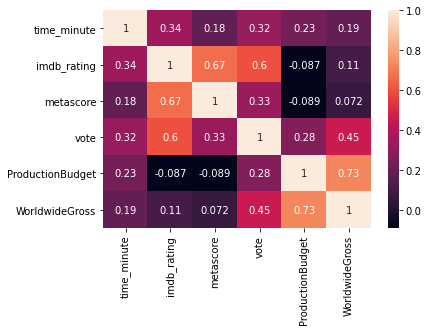

In [33]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

In [34]:
genre_list = dict(genres_dummy_df.sum(axis=0).sort_values(axis=0, ascending=False))
print(genre_list)

{'Drama': 845, 'Action': 563, 'Comedy': 497, 'Adventure': 484, 'Thriller': 305, 'Crime': 292, 'Romance': 225, 'Sci-Fi': 212, 'Mystery': 171, 'Horror': 155, 'Biography': 146, 'Fantasy': 142, 'Animation': 140, 'Family': 92, 'History': 58, 'Sport': 44, 'Music': 32, 'War': 25, 'Musical': 16, 'Western': 11, 'Film-Noir': 1}


In [35]:
def getMostPopularGenres(mydict):
    sortedDict = sorted(mydict, key=mydict.get, reverse=True)
    return sortedDict[:6]
    
most_popular_genres = getMostPopularGenres(genre_list)

In [36]:
most_popular_genres

['Drama', 'Action', 'Comedy', 'Adventure', 'Thriller', 'Crime']

In [37]:
len(genres_dummy_df)

1663

In [38]:
df.genres.value_counts()

Animation, Adventure, Comedy    87
Action, Adventure, Sci-Fi       84
Comedy, Drama, Romance          60
Drama, Romance                  57
Drama                           48
                                ..
Comedy, Crime, Musical           1
Action, Drama, Music             1
Drama, Fantasy                   1
Adventure, Biography, War        1
Crime, Drama, Romance            1
Name: genres, Length: 228, dtype: int64

In [39]:
def changeGenres(my_str,li):
    if my_str in li:
        return my_str
    else:
        return 'Other'
    
df['changedGenres'] = df['genres'].apply(lambda x: changeGenres(x.split(',')[0],most_popular_genres))

In [40]:
df['changedGenres'] = df['changedGenres'].apply(lambda x : 'Other' if(x=='Thriller') else x)

In [41]:
df['changedGenres'].value_counts()

Action       536
Other        354
Drama        280
Comedy       273
Adventure    113
Crime        107
Name: changedGenres, dtype: int64

In [42]:
df = pd.get_dummies(df, columns=['changedGenres'])

In [43]:
df['genre_count'] = df["genres"].str.count(",") + 1

In [44]:
df['release_day_of_week'] = df['ReleaseDate'].apply(lambda x: int(datetime.strftime(x, "%w")))
df['release_day_of_week_summary'] = df['ReleaseDate'].apply(lambda x: "Weekend" if x.isoweekday() in [5, 6, 7] else "Weekday")
df['release_day_of_year'] = df['ReleaseDate'].apply(lambda x: int(datetime.strftime(x, "%j")))


In [45]:
df.head()

Movie  year  time_minute  imdb_rating  metascore  \
0  The Shawshank Redemption  1994          142          9.3         80   
1             The Godfather  1972          175          9.2        100   
3           The Dark Knight  2008          152          9.0         84   
4    The Godfather: Part II  1974          202          9.0         90   
5              12 Angry Men  1957           96          9.0         96   

      vote                genres              director  \
0  2508844                 Drama        Frank Darabont   
1  1728807          Crime, Drama  Francis Ford Coppola   
3  2458791  Action, Crime, Drama     Christopher Nolan   
4  1199671          Crime, Drama  Francis Ford Coppola   
5   740997          Crime, Drama          Sidney Lumet   

                                                cast    age  ...  \
0  Tim Robbins, Morgan Freeman, Bob Gunton, Willi...  13-18  ...   
1  Marlon Brando, Al Pacino, James Caan, Diane Ke...    18+  ...   
3  Christian Bale, Heath Ledger, Aaron Eckhart, M...  13-18  ...   
4  Al Pacino, Robert De Niro, Robert Duvall, Dian...    18+  ...   
5  Henry Fonda, Lee J. Cobb, Martin Balsam, John ...  13-18  ...   

  changedGenres_Action  changedGenres_Adventure  changedGenres_Comedy  \
0                    0                        0                     0   
1                    0                        0                     0   
3                    1                        0                     0   
4                    0                        0                     0   
5                    0                        0                     0   

  changedGenres_Crime  changedGenres_Drama  changedGenres_Other  genre_count  \
0                   0                    1                    0            1   
1                   1                    0                    0            2   
3                   0                    0                    0            3   
4                   1                    0                    0            2   
5                   1                    0                    0            2   

   release_day_of_week  release_day_of_week_summary  release_day_of_year  
0                    5                      Weekend                  266  
1                    3                      Weekday                   75  
3                    5                      Weekend                  193  
4                    3                      Weekday                  345  
5                    6                      Weekend                  103  

[5 rows x 24 columns]

In [46]:
df['release_day_of_week_summary'] = df['ReleaseDate'].apply(lambda x: "Weekend" if x.isoweekday() in [5, 6, 7] else "Weekday")

In [47]:
release_day_dummy_df = pd.Series(df["release_day_of_week_summary"]).str.get_dummies(sep=", ")
release_day_dummy_df.sum(axis=0).sort_values(axis=0, ascending=False)

Weekend    1071
Weekday     592
dtype: int64

In [48]:
df = pd.concat([df, release_day_dummy_df[['Weekday','Weekend']]], axis = 1)

In [49]:
release_q_dummy_df = pd.Series(df["QuarterInYear"]).str.get_dummies(sep=", ")
release_q_dummy_df.sum(axis=0).sort_values(axis=0, ascending=False)

Q4    596
Q3    401
Q2    379
Q1    287
dtype: int64

In [50]:
df = pd.concat([df, release_q_dummy_df[['Q1','Q2','Q3','Q4']]], axis = 1)

In [51]:
df['vote'].sort_values(ascending=False)

0       2508844
3       2458791
8       2205517
9       1973208
11      1936037
         ...   
1443      50581
1836      50373
1835      50373
1419      50208
1743      50061
Name: vote, Length: 1663, dtype: int32

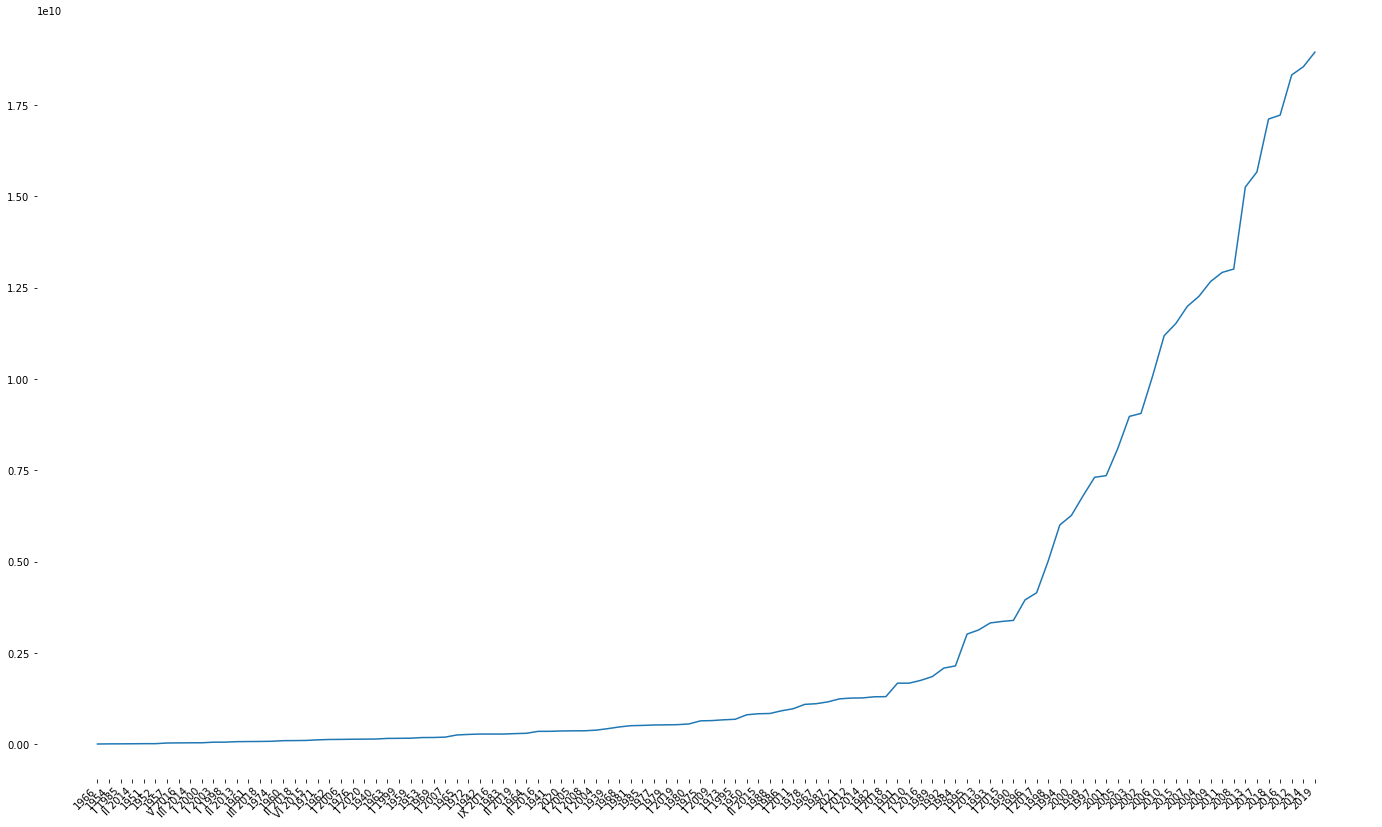

In [52]:
df['year2'] = df['year'].apply(lambda x : int(str(x)[-4:]))
annual_gross_df  =pd.DataFrame(df.groupby('year')['WorldwideGross'].sum().sort_values(ascending=True).reset_index())
plt.figure(figsize =(24, 14))
plt.box(False)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
     
)
plt.plot(annual_gross_df['year'],annual_gross_df['WorldwideGross'])




In [53]:
df['NetProfit'] = df['WorldwideGross'] - df['ProductionBudget']


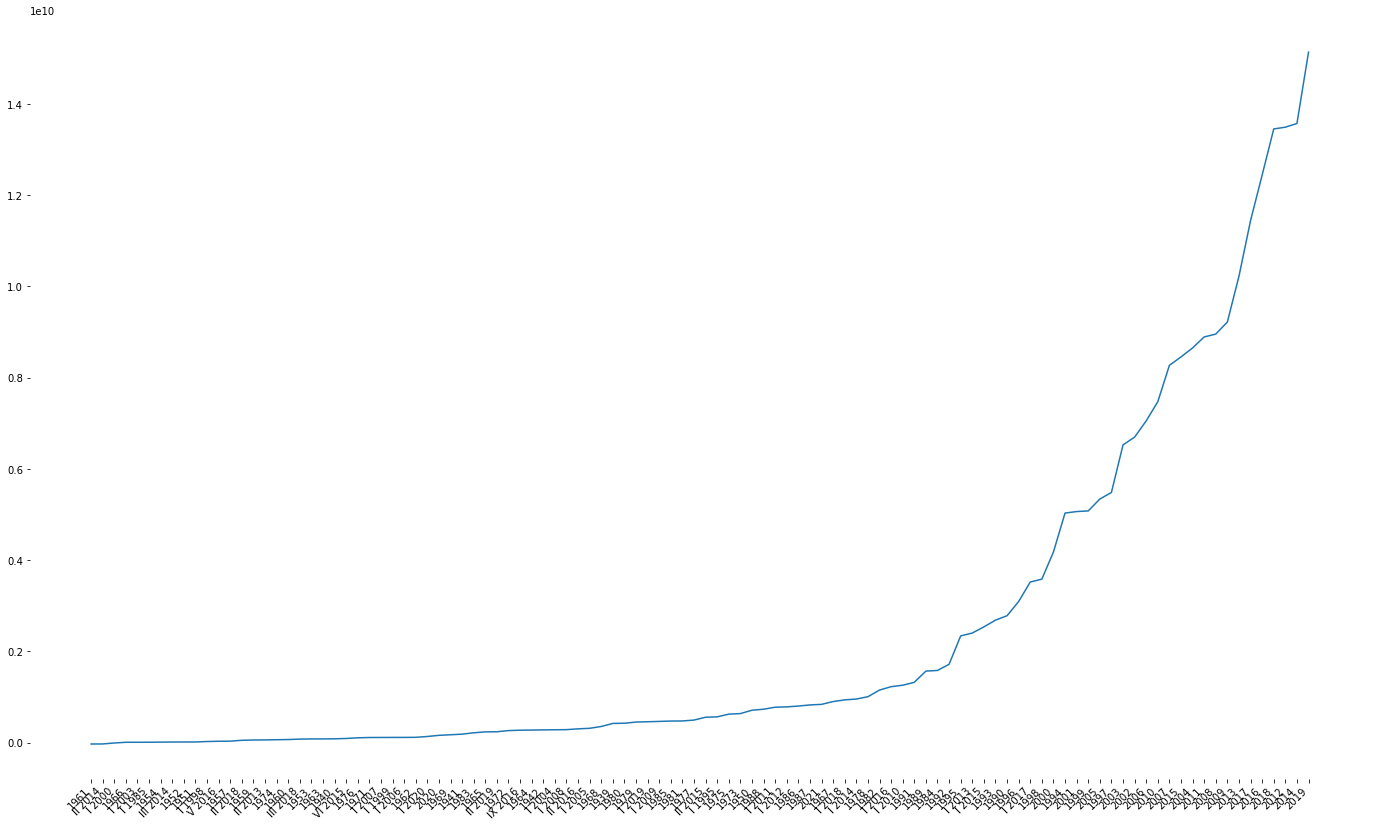

In [54]:
annual_gross_df  =pd.DataFrame(df.groupby('year')['NetProfit'].sum().sort_values(ascending=True).reset_index())
plt.figure(figsize =(24, 14))
plt.box(False)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
     
)
plt.plot(annual_gross_df['year'],annual_gross_df['NetProfit'])


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 2208
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Movie                        1663 non-null   object        
 1   year                         1663 non-null   object        
 2   time_minute                  1663 non-null   int32         
 3   imdb_rating                  1663 non-null   float64       
 4   metascore                    1663 non-null   int32         
 5   vote                         1663 non-null   int32         
 6   genres                       1663 non-null   object        
 7   director                     1663 non-null   object        
 8   cast                         1663 non-null   object        
 9   age                          1663 non-null   object        
 10  ReleaseDate                  1663 non-null   datetime64[ns]
 11  ProductionBudget             1663 non-null 

In [56]:
top_100_director = set()

sorted_df = df.sort_values(by='WorldwideGross',ascending=False)
top_100 = sorted_df.head(100)

for index, row in top_100.iterrows():      
    top_100_director.add(row['director'])
    
print(top_100_director)

{'Matt Reeves', 'Robert Zemeckis', ':Roger Allers, Rob Minkoff', ':Pete Docter, Ronnie Del Carmen', ':Kyle Balda, Pierre Coffin, Eric Guillon', 'James Wan', 'Todd Phillips', 'Gary Ross', 'Patty Jenkins', 'Mike Newell', ':Steve Martino, Michael Thurmeier', ':Chris Miller, Raman Hui', ':Andrew Stanton, Angus MacLane', ':Kyle Balda, Pierre Coffin', 'James Gunn', 'Lee Unkrich', 'Andy Muschietti', 'Francis Lawrence', 'Steven Spielberg', 'Dan Scanlon', 'F. Gary Gray', 'J.A. Bayona', 'Wolfgang Reitherman', 'Chris Renaud', 'Peter Jackson', 'Robert Stromberg', ':Pierre Coffin, Chris Renaud', 'Zack Snyder', 'Josh Cooley', 'Marc Webb', ':Joachim Rønning, Espen Sandberg', ':Chris Buck, Jennifer Lee', 'Ruben Fleischer', ':Eric Darnell, Tom McGrath, Conrad Vernon', 'David Yates', ':Pete Docter, Bob Peterson', 'Joss Whedon', 'Alfonso Cuarón', 'Jake Kasdan', 'Colin Trevorrow', ':Anna Boden, Ryan Fleck', 'Michael Bay', ':Andrew Stanton, Lee Unkrich', ':Lana Wachowski, Lilly Wachowski', 'Roland Emmerich

In [57]:
def oneHotColumn(x,li):
    if x in li:
        return 1
    else:
        return 0

In [58]:
df['good_director'] = df['director'].apply(lambda x : oneHotColumn(x,top_100_director))

In [59]:
df['good_director'].value_counts()

0    1379
1     284
Name: good_director, dtype: int64

In [60]:
vot_df = df.groupby(['Movie'])[['vote']].sum().sort_values(by ='vote', ascending = False).reset_index()
vot_df.head(10)

Movie     vote
0                                       The Avengers  2647486
1                           The Shawshank Redemption  2508844
2                                    The Dark Knight  2458791
3                                      The Lion King  2454248
4                                          Inception  2205517
5                                         Fight Club  1973208
6                                       Forrest Gump  1936037
7                                       Pulp Fiction  1934965
8                                         The Matrix  1793447
9  The Lord of the Rings: The Fellowship of the Ring  1753764

Text(0, 0.5, 'Vote')

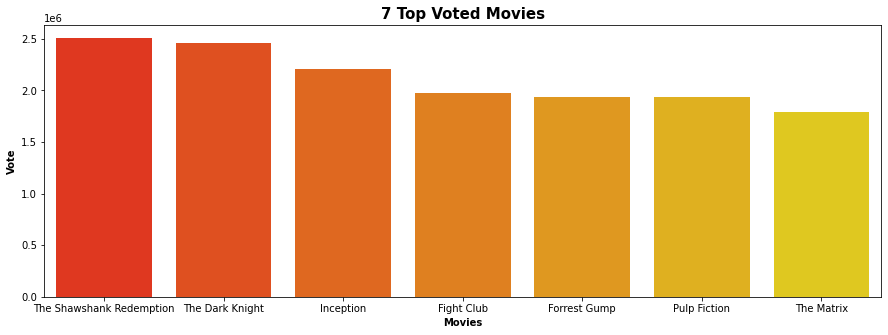

In [61]:
top_voted = df.sort_values(['vote'], ascending = False)
fig,ax=plt.subplots(figsize=(15,5))
ax.set(facecolor = 'white')
sns.barplot(x=top_voted['Movie'][:7], y=top_voted['vote'][:7], palette = 'autumn')
plt.title('7 Top Voted Movies', fontweight = 'bold', fontsize = 15)
plt.xlabel('Movies', fontsize = 10, fontweight = 'bold')
plt.ylabel('Vote', fontsize = 10, fontweight = 'bold')

In [62]:
df.corr()

time_minute  imdb_rating  metascore      vote  \
time_minute                 1.000000     0.343217   0.183860  0.319625   
imdb_rating                 0.343217     1.000000   0.666674  0.601415   
metascore                   0.183860     0.666674   1.000000  0.331266   
vote                        0.319625     0.601415   0.331266  1.000000   
ProductionBudget            0.234825    -0.086858  -0.089152  0.275185   
WorldwideGross              0.189258     0.107062   0.072378  0.451798   
changedGenres_Action        0.130768    -0.178407  -0.227058  0.121650   
changedGenres_Adventure     0.102882     0.057045   0.054578  0.023850   
changedGenres_Comedy       -0.192171    -0.132162  -0.040175 -0.121848   
changedGenres_Crime         0.096774     0.112756   0.064741  0.080877   
changedGenres_Drama         0.117317     0.166840   0.111341 -0.023835   
changedGenres_Other        -0.203908     0.068120   0.121457 -0.069983   
genre_count                 0.031383    -0.120380  -0.070399 -0.048135   
release_day_of_week        -0.151272    -0.054564  -0.084181 -0.070005   
release_day_of_year         0.196504     0.174183   0.177781  0.005950   
Weekday                     0.107967     0.022358   0.078324  0.079148   
Weekend                    -0.107967    -0.022358  -0.078324 -0.079148   
Q1                         -0.112809    -0.101493  -0.146024 -0.051249   
Q2                         -0.030439    -0.055937  -0.026859  0.064841   
Q3                         -0.095880    -0.051897  -0.010028 -0.007242   
Q4                          0.201056     0.175208   0.147513 -0.009875   
year2                      -0.066397    -0.281145  -0.205398 -0.053356   
NetProfit                   0.162800     0.145742   0.105959  0.458327   
good_director               0.167078     0.130774   0.065546  0.309149   

                         ProductionBudget  WorldwideGross  \
time_minute                      0.234825        0.189258   
imdb_rating                     -0.086858        0.107062   
metascore                       -0.089152        0.072378   
vote                             0.275185        0.451798   
ProductionBudget                 1.000000        0.726358   
WorldwideGross                   0.726358        1.000000   
changedGenres_Action             0.337297        0.191780   
changedGenres_Adventure          0.072801        0.068626   
changedGenres_Comedy            -0.204120       -0.137472   
changedGenres_Crime             -0.107186       -0.086776   
changedGenres_Drama             -0.213702       -0.162110   
changedGenres_Other              0.014451        0.063453   
genre_count                      0.246898        0.137807   
release_day_of_week             -0.186905       -0.219028   
release_day_of_year             -0.041866       -0.041307   
Weekday                          0.213397        0.253060   
Weekend                         -0.213397       -0.253060   
Q1                              -0.063056       -0.070082   
Q2                               0.170341        0.190341   
Q3                              -0.045896       -0.066976   
Q4                              -0.058378       -0.051532   
year2                            0.215369        0.132509   
NetProfit                        0.600699        0.985815   
good_director                    0.399520        0.509237   

                         changedGenres_Action  changedGenres_Adventure  \
time_minute                          0.130768                 0.102882   
imdb_rating                         -0.178407                 0.057045   
metascore                           -0.227058                 0.054578   
vote                                 0.121650                 0.023850   
ProductionBudget                     0.337297                 0.072801   
WorldwideGross                       0.191780                 0.068626   
changedGenres_Action                 1.000000                -0.186206   
changedGenres_Adventure             -0.186206           

<AxesSubplot:>

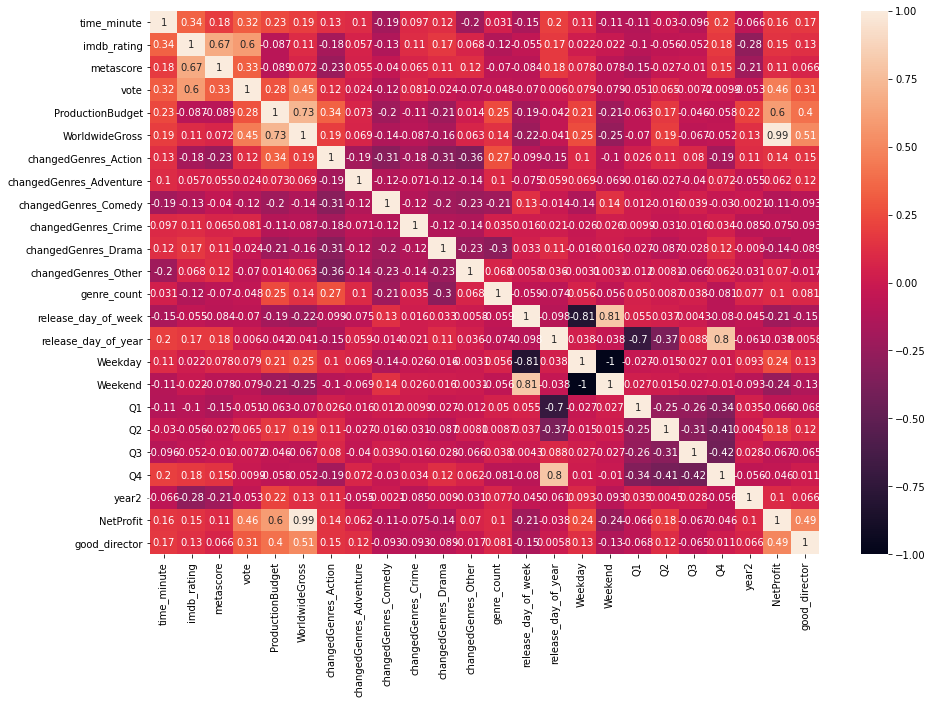

In [63]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(15,10)) 
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

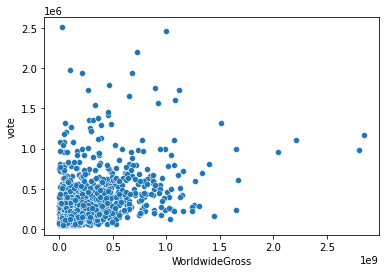

In [64]:
sns.scatterplot(x ='WorldwideGross', y='vote', data=df);

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

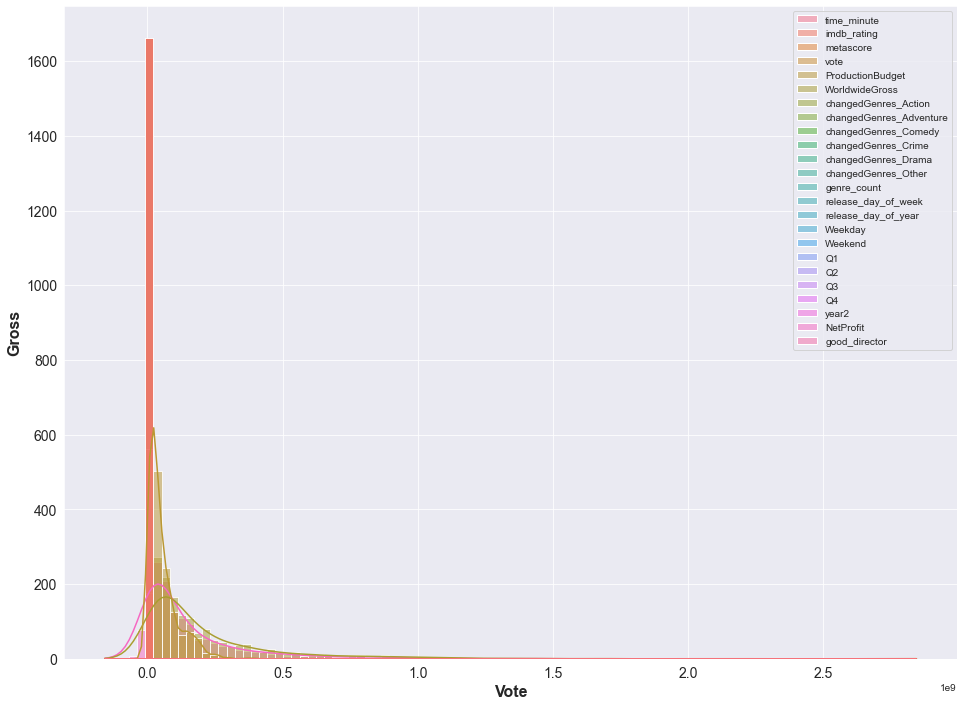

In [65]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,12))

sns.histplot(data=df,bins=100, kde=True,)

plt.xlabel('Vote', size=16, fontweight='bold')
plt.ylabel('Gross', size=16, fontweight='bold')

plt.xticks(size=14)
plt.yticks(size=14)

In [66]:
good_actors = set()

    
for index, row in top_100.iterrows():
    stars = row['cast'].split(',')
    for i in range(0,3):
        good_actors.add(stars[i])

  
print(good_actors)

{' Josh Hutcherson', 'Ryan Reynolds', ' Laura Dern', 'Louis C.K.', 'Tom Hardy', ' Michelle Williams', ' Chris Evans', 'Tobey Maguire', ' Amber Heard', ' Topher Grace', ' Samuel L. Jackson', 'Ginnifer Goodwin', ' Louis Prima', ' Finn Wolfhard', ' Rhys Ifans', ' Tim Allen', ' Michael B. Jordan', 'Sam Neill', 'Kristen Bell', ' Drew Barrymore', 'Albert Brooks', ' Ian McShane', ' Helena Bonham Carter', ' Naomi Scott', ' Kristen Wiig', ' Ellen DeGeneres', ' Jason Bateman', 'Rami Malek', ' John Goodman', ' Gwilym Lee', ' Robin Wright', 'Donald Glover', ' Jeremy Irons', ' Sarah Vowell', 'Ray Romano', ' John Leguizamo', 'Shia LaBeouf', ' Karen Gillan', ' Beyoncé', 'Eddie Redmayne', 'Elijah Wood', ' Penélope Cruz', 'Chris Hemsworth', ' Josh Brolin', ' George Clooney', ' Jason Statham', ' Christoph Waltz', ' Emma Stone', ' Lewis Black', 'Martin Freeman', ' Keri Russell', ' Tyrese Gibson', ' Mark Ruffalo', 'Joaquin Phoenix', 'Christian Bale', 'Mike Myers', ' Jordan Nagai', ' Javier Bardem', ' Riz 

In [67]:
def oneHotActor(x,li):
    stars = x.split(',')
    for i in range(0,3):
        if stars[i] in li:
            return 1
    return 0

In [68]:
df['good_actor'] = df['cast'].apply(lambda x : oneHotActor(x,good_actors))

In [69]:
df['good_actor'].value_counts()

0    1073
1     590
Name: good_actor, dtype: int64

In [70]:
df.cast

0       Tim Robbins, Morgan Freeman, Bob Gunton, Willi...
1       Marlon Brando, Al Pacino, James Caan, Diane Ke...
3       Christian Bale, Heath Ledger, Aaron Eckhart, M...
4       Al Pacino, Robert De Niro, Robert Duvall, Dian...
5       Henry Fonda, Lee J. Cobb, Martin Balsam, John ...
                              ...                        
2201    Hugh Jackman, Kate Beckinsale, Richard Roxburg...
2202    Ben Stiller, Owen Wilson, Snoop Dogg, Vince Va...
2206    Samuel L. Jackson, Colin Farrell, Michelle Rod...
2207    David Duchovny, Orlando Jones, Julianne Moore,...
2208    Pierce Brosnan, Halle Berry, Rosamund Pike, To...
Name: cast, Length: 1663, dtype: object

In [71]:
df['GOB'] = df.apply(lambda row: row['WorldwideGross']/row['ProductionBudget'] if row['ProductionBudget']!=0 else 0, axis=1)
top_GOB=df.sort_values('GOB',ascending=False).head(15)

In [72]:
df['GOB2'] = df['GOB']**2

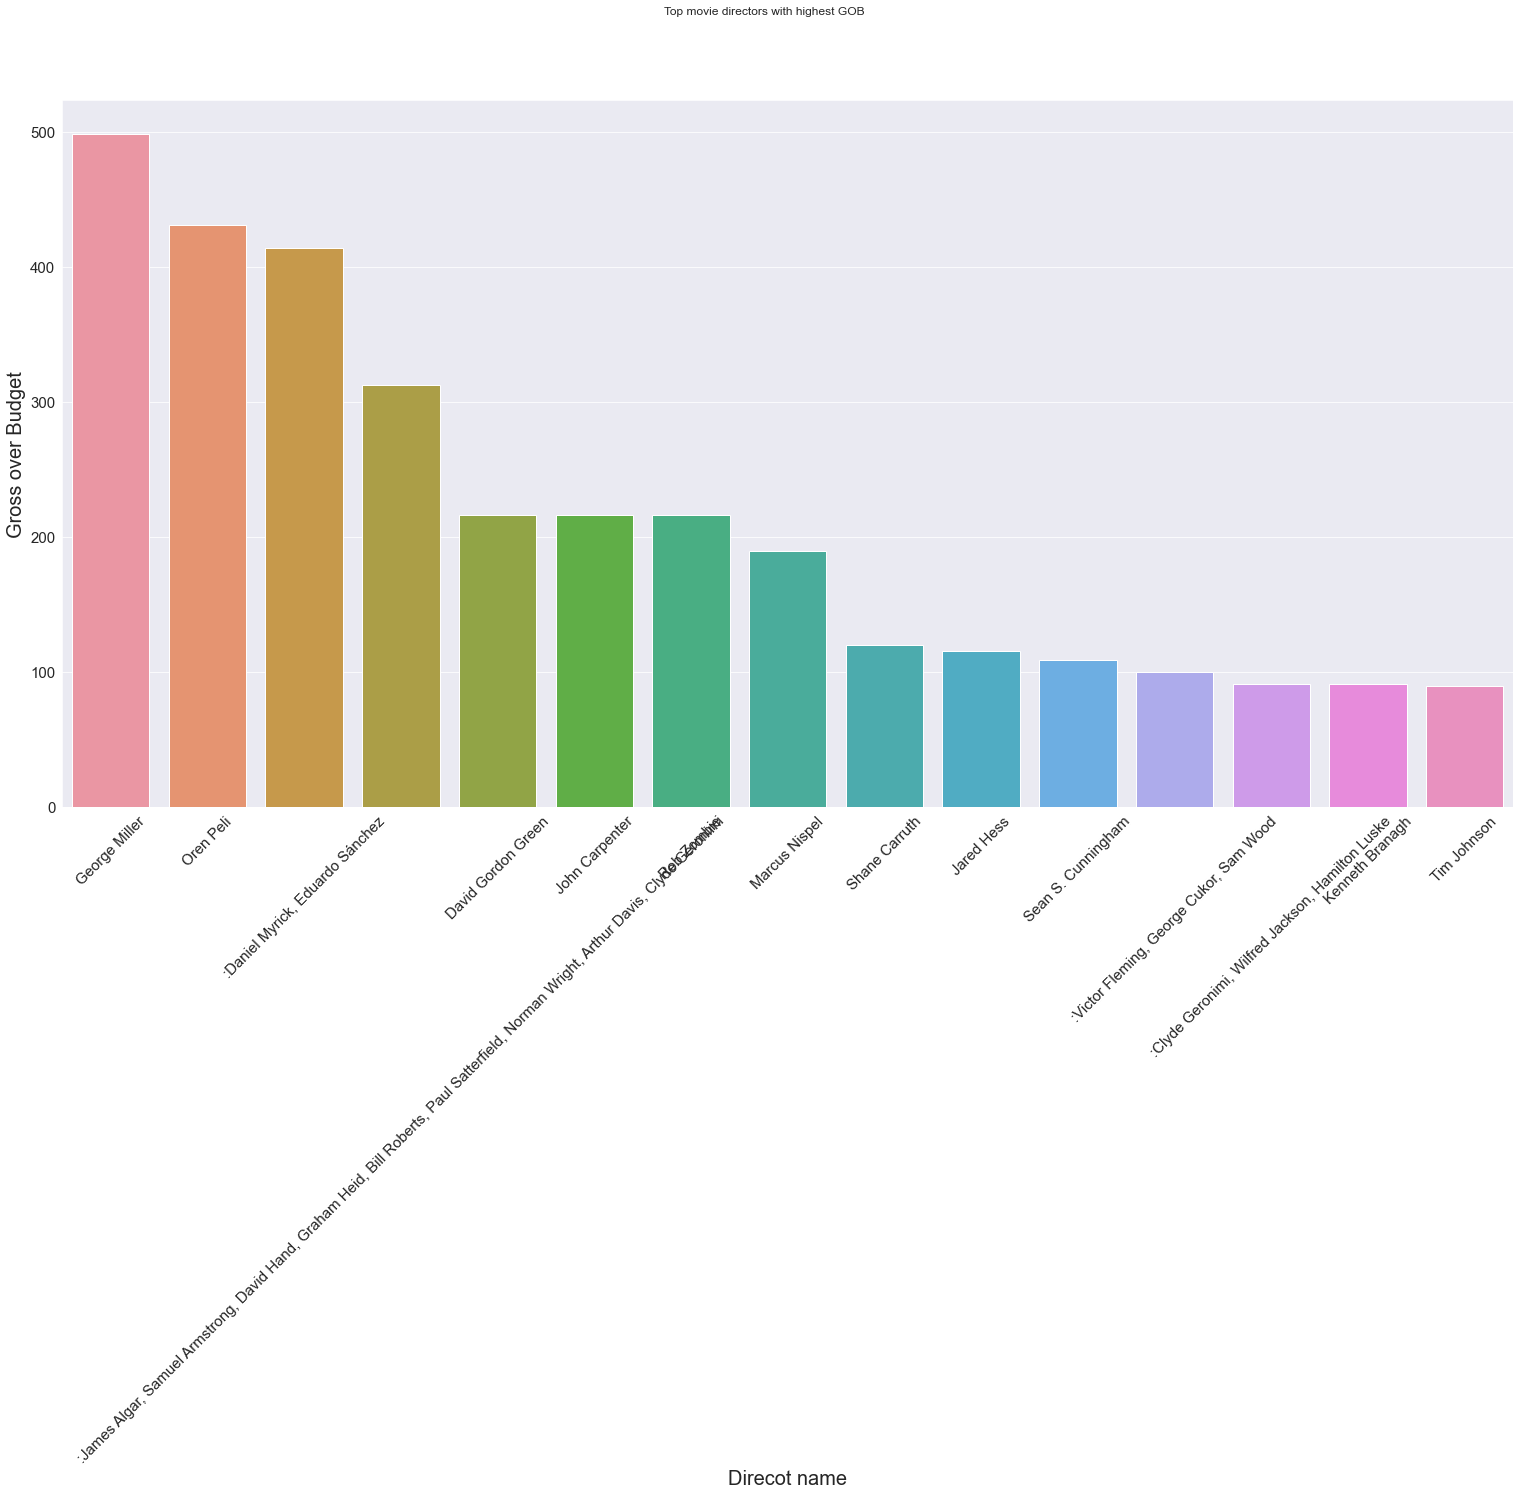

In [73]:
fig,ax = plt.subplots(figsize=(26, 13))
# Draw a bar graph
ax = sns.barplot(x='director', y='GOB', data=top_GOB,ci=None)
# Rotate the directors' name 45 degrees 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# Title the graph
fig.suptitle('Top movie directors with highest GOB', fontsize=12)
# Set font size of axis label
ax.set_xlabel('Direcot name',fontsize=20)
ax.set_ylabel('Gross over Budget',fontsize=20)
# Set tick size of axis 
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
#Show the graph
plt.show();

In [74]:
df.sample(5)

Movie     year  time_minute  imdb_rating  metascore  \
28             The Pianist     2002          150          8.5         85   
42                   Joker     2019          122          8.4         59   
1797              Cellular     2004           94          6.5         60   
1036  The Age of Innocence     1993          139          7.2         90   
1618                 Focus  II 2015          105          6.6         56   

         vote                   genres                    director  \
28     782456  Biography, Drama, Music              Roman Polanski   
42    1111180   Crime, Drama, Thriller               Todd Phillips   
1797    98396  Action, Crime, Thriller              David R. Ellis   
1036    57484           Drama, Romance             Martin Scorsese   
1618   234409     Comedy, Crime, Drama  :Glenn Ficarra, John Requa   

                                                   cast    age  ... Q1  Q2  \
28    Adrien Brody, Thomas Kretschmann, Frank Finlay...    18+  ...  0   0   
42    Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...    18+  ...  0   0   
1797  Kim Basinger, Chris Evans, Jason Statham, Will...  13-18  ...  0   0   
1036  Daniel Day-Lewis, Michelle Pfeiffer, Winona Ry...  13-18  ...  0   0   
1618  Will Smith, Margot Robbie, Rodrigo Santoro, Ad...  13-18  ...  1   0   

      Q3 Q4  year2     NetProfit  good_director  good_actor        GOB  \
28     0  1   2002  7.685418e+07              0           0   3.195834   
42     0  1   2019  1.017508e+09              1           1  19.500137   
1797   1  0   2004  1.645342e+07              0           1   1.365632   
1036   1  0   1993 -1.985007e+06              0           0   0.941617   
1618   0  0   2015  1.030657e+08              0           1   2.585626   

            GOB2  
28     10.213353  
42    380.255330  
1797    1.864950  
1036    0.886643  
1618    6.685463  

[5 rows x 36 columns]

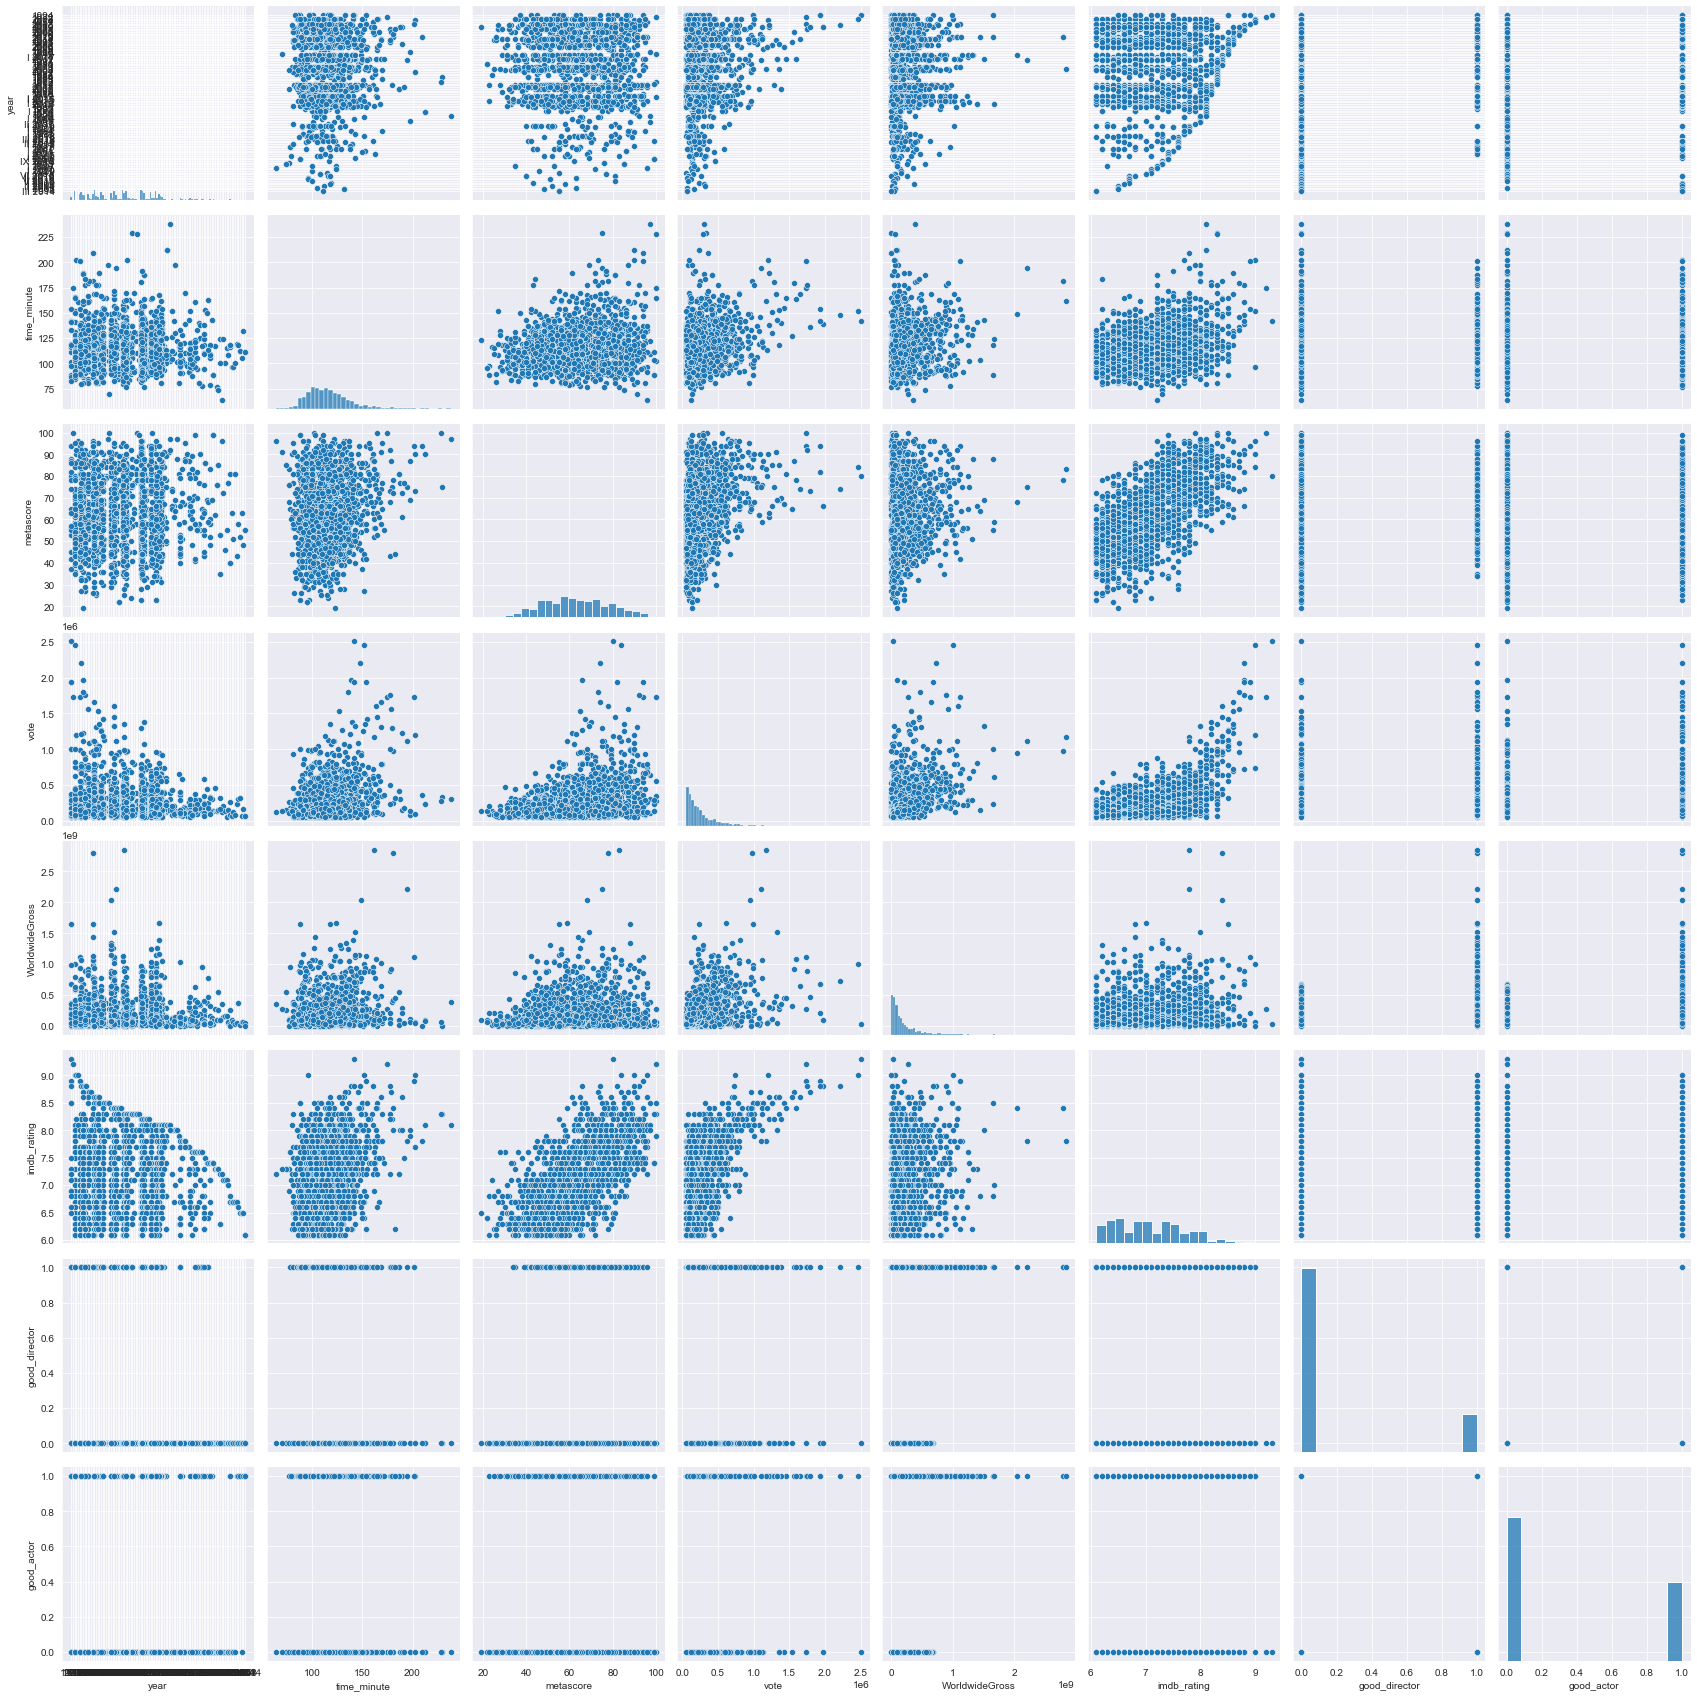

In [75]:
sns.pairplot( data=df, height=3, vars=['year', 'time_minute', 'metascore',
       'vote', 'WorldwideGross','imdb_rating','good_director','good_actor'])

plt.show()

In [76]:
df.corr()

time_minute  imdb_rating  metascore      vote  \
time_minute                 1.000000     0.343217   0.183860  0.319625   
imdb_rating                 0.343217     1.000000   0.666674  0.601415   
metascore                   0.183860     0.666674   1.000000  0.331266   
vote                        0.319625     0.601415   0.331266  1.000000   
ProductionBudget            0.234825    -0.086858  -0.089152  0.275185   
WorldwideGross              0.189258     0.107062   0.072378  0.451798   
changedGenres_Action        0.130768    -0.178407  -0.227058  0.121650   
changedGenres_Adventure     0.102882     0.057045   0.054578  0.023850   
changedGenres_Comedy       -0.192171    -0.132162  -0.040175 -0.121848   
changedGenres_Crime         0.096774     0.112756   0.064741  0.080877   
changedGenres_Drama         0.117317     0.166840   0.111341 -0.023835   
changedGenres_Other        -0.203908     0.068120   0.121457 -0.069983   
genre_count                 0.031383    -0.120380  -0.070399 -0.048135   
release_day_of_week        -0.151272    -0.054564  -0.084181 -0.070005   
release_day_of_year         0.196504     0.174183   0.177781  0.005950   
Weekday                     0.107967     0.022358   0.078324  0.079148   
Weekend                    -0.107967    -0.022358  -0.078324 -0.079148   
Q1                         -0.112809    -0.101493  -0.146024 -0.051249   
Q2                         -0.030439    -0.055937  -0.026859  0.064841   
Q3                         -0.095880    -0.051897  -0.010028 -0.007242   
Q4                          0.201056     0.175208   0.147513 -0.009875   
year2                      -0.066397    -0.281145  -0.205398 -0.053356   
NetProfit                   0.162800     0.145742   0.105959  0.458327   
good_director               0.167078     0.130774   0.065546  0.309149   
good_actor                  0.106115     0.015260  -0.008923  0.207264   
GOB                        -0.102277     0.013946   0.089634  0.023676   
GOB2                       -0.082443    -0.032897   0.040955 -0.014608   

                         ProductionBudget  WorldwideGross  \
time_minute                      0.234825        0.189258   
imdb_rating                     -0.086858        0.107062   
metascore                       -0.089152        0.072378   
vote                             0.275185        0.451798   
ProductionBudget                 1.000000        0.726358   
WorldwideGross                   0.726358        1.000000   
changedGenres_Action             0.337297        0.191780   
changedGenres_Adventure          0.072801        0.068626   
changedGenres_Comedy            -0.204120       -0.137472   
changedGenres_Crime             -0.107186       -0.086776   
changedGenres_Drama             -0.213702       -0.162110   
changedGenres_Other              0.014451        0.063453   
genre_count                      0.246898        0.137807   
release_day_of_week             -0.186905       -0.219028   
release_day_of_year             -0.041866       -0.041307   
Weekday                          0.213397        0.253060   
Weekend                         -0.213397       -0.253060   
Q1                              -0.063056       -0.070082   
Q2                               0.170341        0.190341   
Q3                              -0.045896       -0.066976   
Q4                              -0.058378       -0.051532   
year2                            0.215369        0.132509   
NetProfit                        0.600699        0.985815   
good_director                    0.399520        0.509237   
good_actor                       0.295411        0.318174   
GOB                             -0.135635        0.026960   
GOB2                            -0.065973       -0.009952   

                         changedGenres_Action  changedGenres_Adventure  \
time_minute                          0.130768                 0.102882   
imdb_rating                         -0.178407                 0.057045   
metascore            

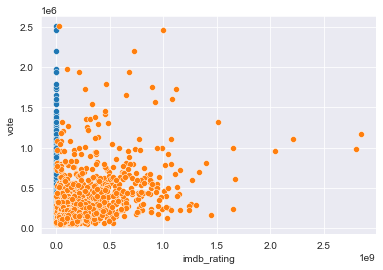

In [77]:
sns.scatterplot(x ='imdb_rating', y='vote', data=df);
sns.scatterplot(x ='WorldwideGross', y='vote', data=df);

In [78]:
age_dummy_df = pd.get_dummies(pd.Series(df['age']), drop_first=True)
age_dummy_df.sum(axis=0).sort_values(axis=0, ascending=False)
df = pd.concat([df, age_dummy_df], axis = 1)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 2208
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Movie                        1663 non-null   object        
 1   year                         1663 non-null   object        
 2   time_minute                  1663 non-null   int32         
 3   imdb_rating                  1663 non-null   float64       
 4   metascore                    1663 non-null   int32         
 5   vote                         1663 non-null   int32         
 6   genres                       1663 non-null   object        
 7   director                     1663 non-null   object        
 8   cast                         1663 non-null   object        
 9   age                          1663 non-null   object        
 10  ReleaseDate                  1663 non-null   datetime64[ns]
 11  ProductionBudget             1663 non-null 

In [80]:
df['time_minute'].sort_values(ascending=True)

1050     64
937      70
934      74
933      74
1323     77
       ... 
157     212
156     212
76      228
70      229
162     238
Name: time_minute, Length: 1663, dtype: int32

In [81]:
def classifyNums(num):
    if(int(num)<=90):
        return 'short'
    elif(int(num)<=150):
        return 'normal'
    else:
         return 'long'

In [82]:
df['time_period'] = df['time_minute'].apply(lambda x: classifyNums(x))

In [83]:
df['time_minute'].sort_values(ascending= True)

1050     64
937      70
934      74
933      74
1323     77
       ... 
157     212
156     212
76      228
70      229
162     238
Name: time_minute, Length: 1663, dtype: int32

In [84]:
df['time_period'].value_counts()

normal    1443
short      124
long        96
Name: time_period, dtype: int64

In [85]:
time_dummy_df = pd.get_dummies(pd.Series(df['time_period']))
df = pd.concat([df, time_dummy_df], axis = 1)

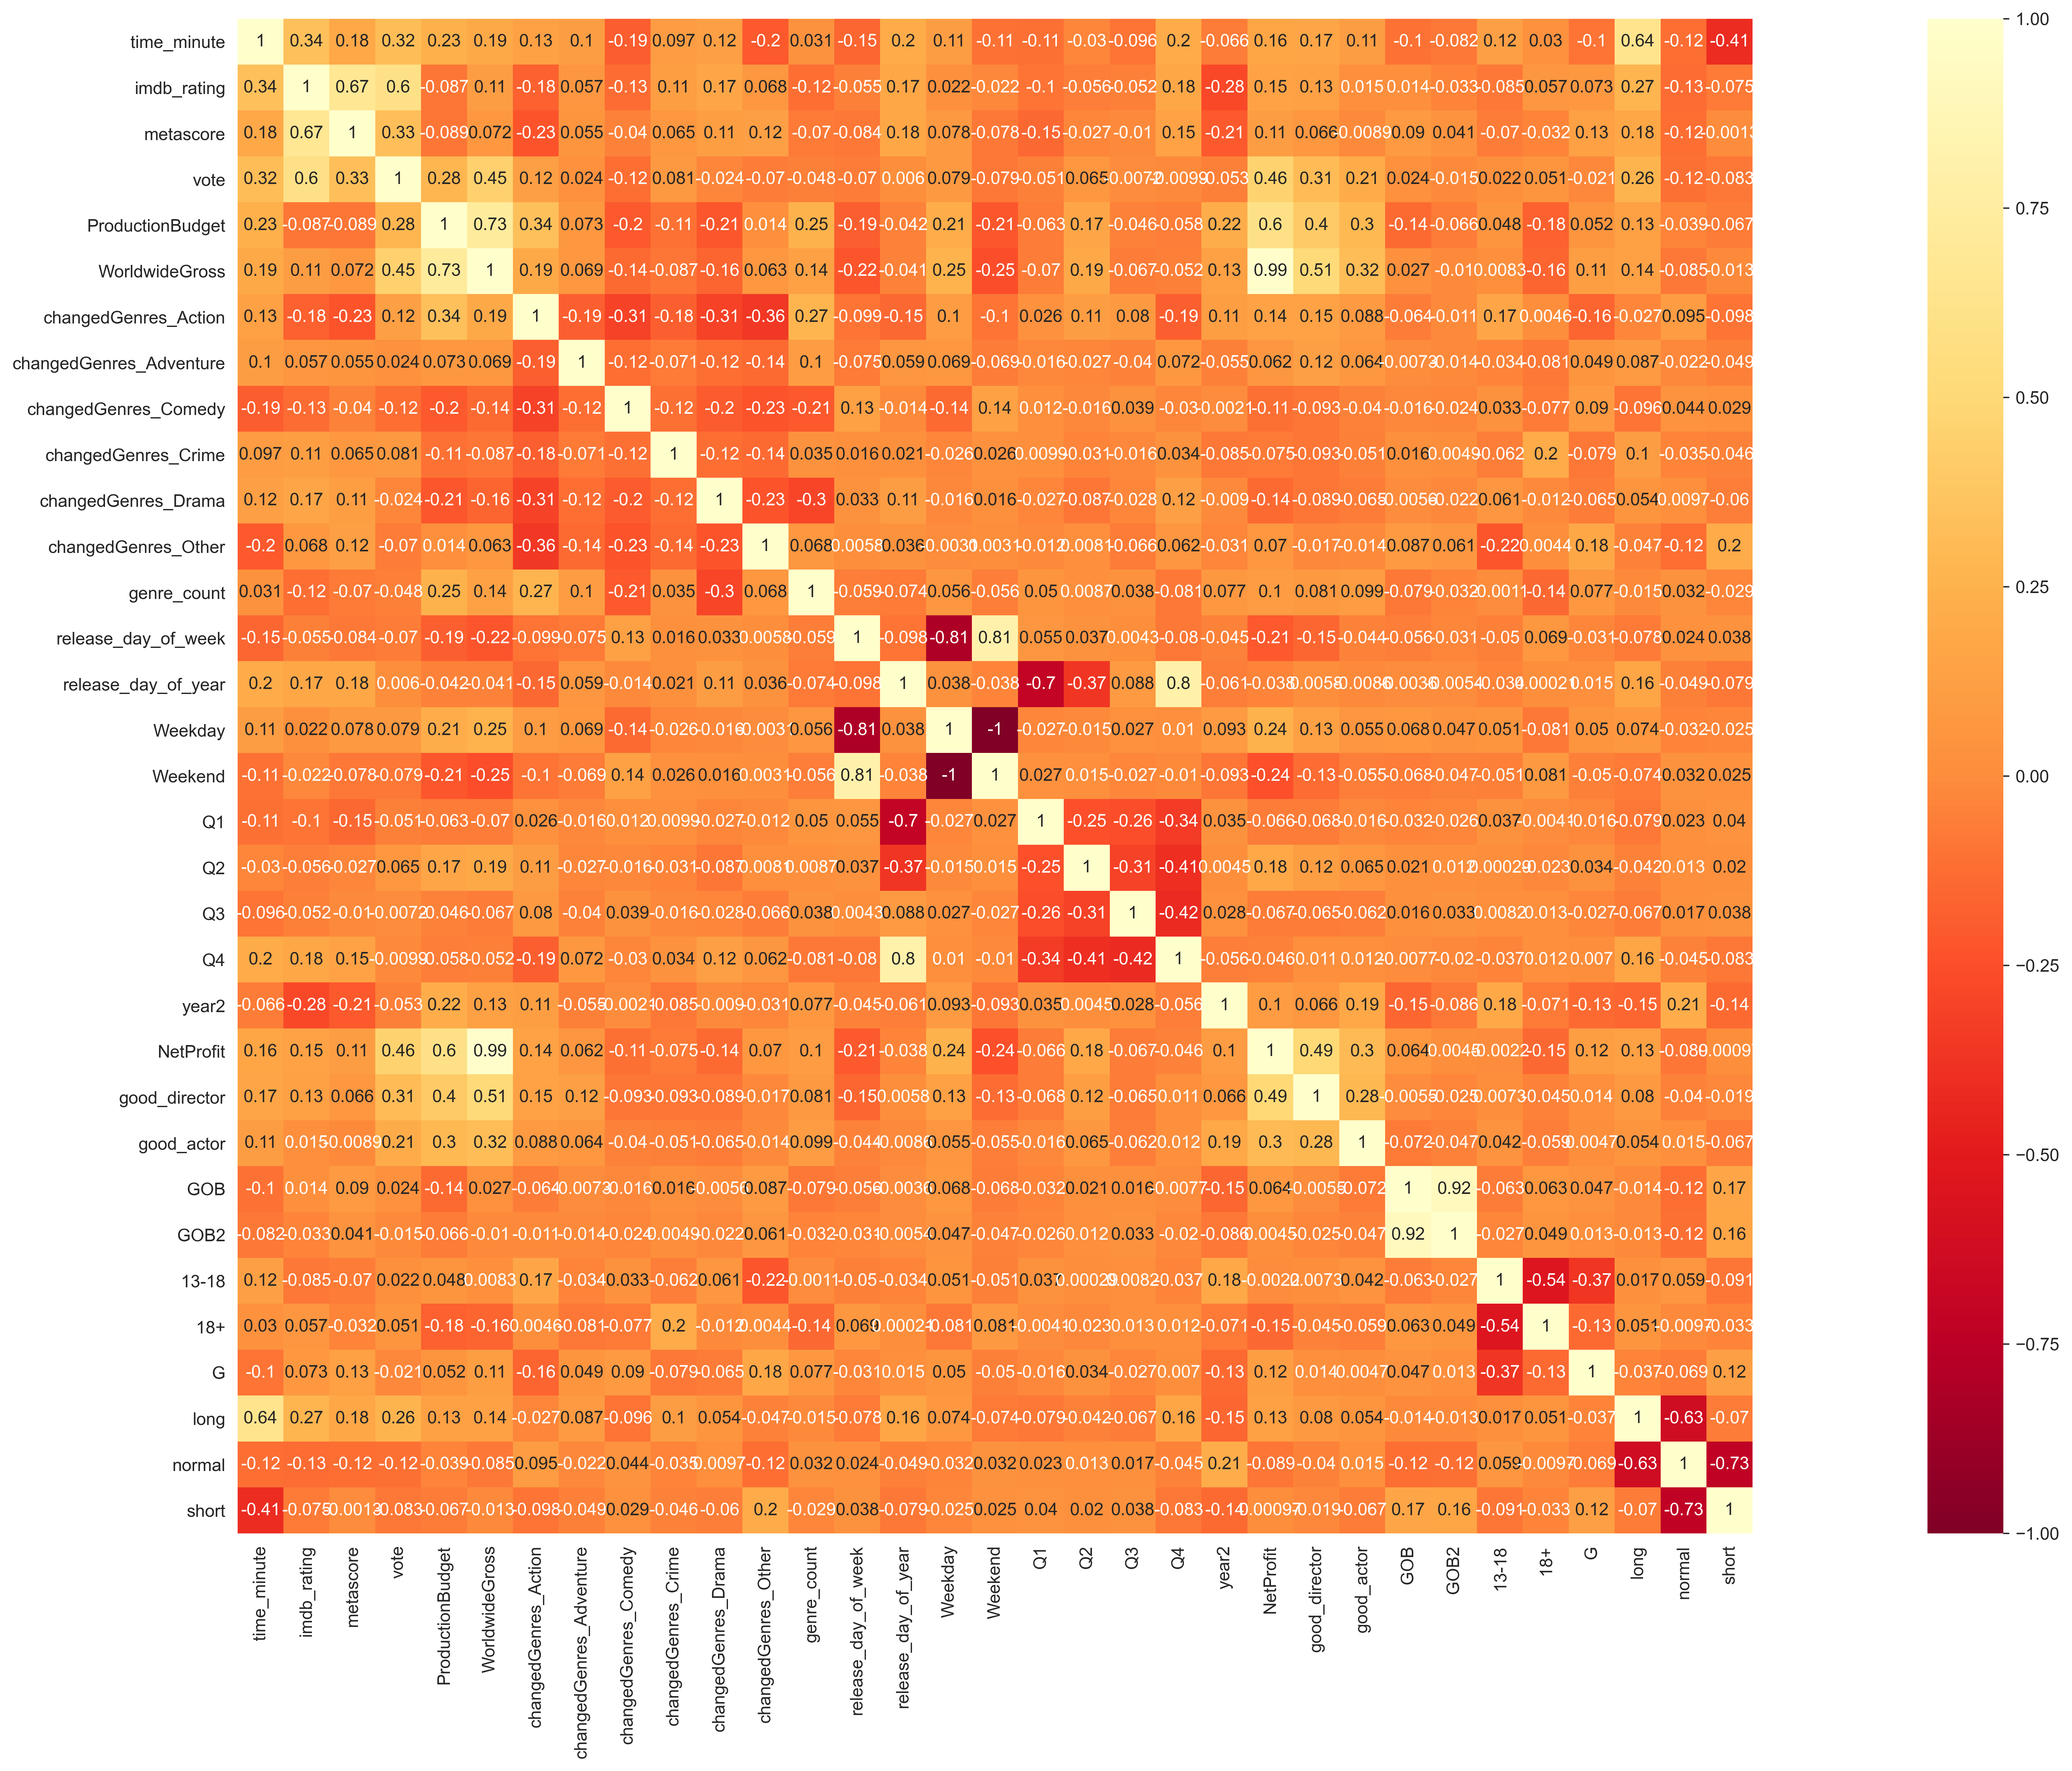

In [86]:
plt.figure(figsize=(36,16),dpi=400),
sns.heatmap(df.corr(),square=True, annot=True, vmin=-1, vmax=1,cmap="YlOrRd_r",);

In [87]:
df['vote'].sort_values(ascending=True)

1743      50061
1419      50208
1835      50373
1836      50373
1443      50581
         ...   
11      1936037
9       1973208
8       2205517
3       2458791
0       2508844
Name: vote, Length: 1663, dtype: int32

In [88]:
df['NetProfit'].sort_values()

321    -1.580898e+08
692    -7.196527e+07
690    -5.385222e+07
1929   -5.186817e+07
1847   -4.322557e+07
            ...     
1232    1.454980e+09
45      1.744541e+09
351     2.007987e+09
44      2.397801e+09
335     2.608900e+09
Name: NetProfit, Length: 1663, dtype: float64

Text(0, 0.5, 'WorldwideGross')

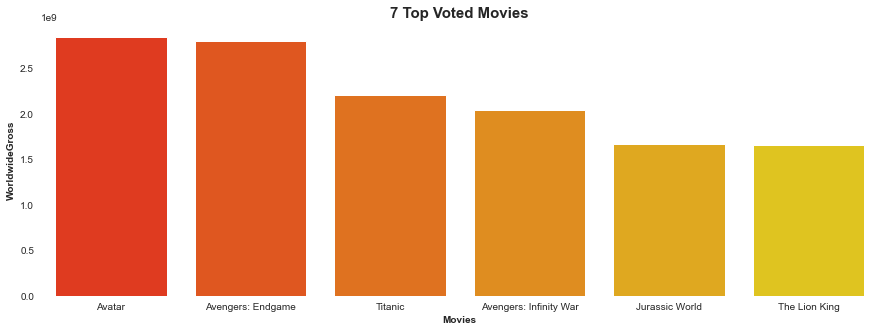

In [89]:
top_voted = df.sort_values(['WorldwideGross'], ascending = False)
fig,ax=plt.subplots(figsize=(15,5))
ax.set(facecolor = 'white')
sns.barplot(x=top_voted['Movie'][:7], y=top_voted['WorldwideGross'][:7], palette = 'autumn')
plt.title('7 Top Voted Movies', fontweight = 'bold', fontsize = 15)
plt.xlabel('Movies', fontsize = 10, fontweight = 'bold')
plt.ylabel('WorldwideGross', fontsize = 10, fontweight = 'bold')

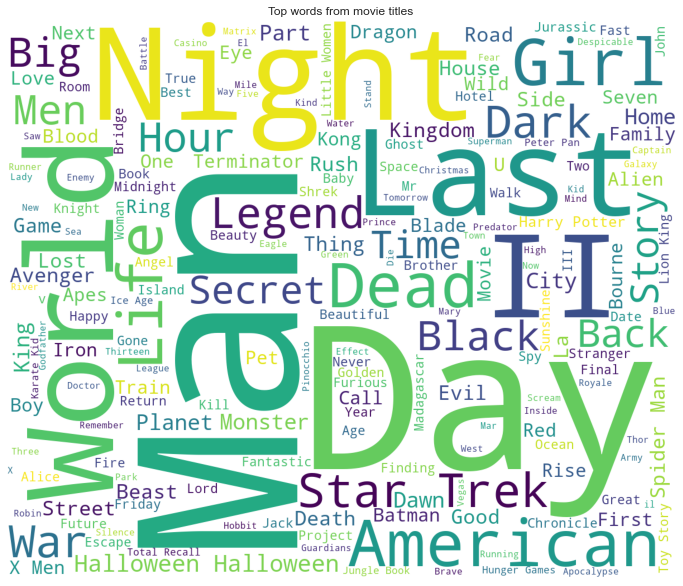

 Time taken to complete this operation is 4.817697763442993 seconds


In [90]:
import time
from wordcloud import WordCloud
#let's find top words from movie Titles
start = time.time()
plt.figure(figsize = (12, 12))
token_title = ' '.join(df['Movie'].values) #create split to title by sprace to extract the text.
#bg color set to white for good contrast, by default bg color is darker
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(token_title)
plt.imshow(wordcloud)
plt.title('Top words from movie titles ')
plt.axis("off") # we dont need axes for this
plt.show()
print(" Time taken to complete this operation is", time.time() - start, 'seconds')

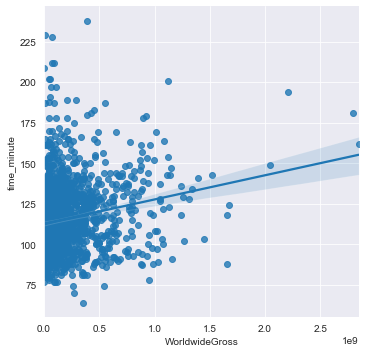

In [91]:
sns.lmplot(x ='WorldwideGross', y='time_minute', data=df ,palette="Set1" )

In [92]:
#df['release_day_of_week_summary'].apply(lambda x: 0 if x=='Weekday' else 1)

# Regression

In [93]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 2208
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Movie                        1663 non-null   object        
 1   year                         1663 non-null   object        
 2   time_minute                  1663 non-null   int32         
 3   imdb_rating                  1663 non-null   float64       
 4   metascore                    1663 non-null   int32         
 5   vote                         1663 non-null   int32         
 6   genres                       1663 non-null   object        
 7   director                     1663 non-null   object        
 8   cast                         1663 non-null   object        
 9   age                          1663 non-null   object        
 10  ReleaseDate                  1663 non-null   datetime64[ns]
 11  ProductionBudget             1663 non-null 

In [95]:
df.columns

Index(['Movie', 'year', 'time_minute', 'imdb_rating', 'metascore', 'vote',
       'genres', 'director', 'cast', 'age', 'ReleaseDate', 'ProductionBudget',
       'WorldwideGross', 'QuarterInYear', 'changedGenres_Action',
       'changedGenres_Adventure', 'changedGenres_Comedy',
       'changedGenres_Crime', 'changedGenres_Drama', 'changedGenres_Other',
       'genre_count', 'release_day_of_week', 'release_day_of_week_summary',
       'release_day_of_year', 'Weekday', 'Weekend', 'Q1', 'Q2', 'Q3', 'Q4',
       'year2', 'NetProfit', 'good_director', 'good_actor', 'GOB', 'GOB2',
       '13-18', '18+', 'G', 'time_period', 'long', 'normal', 'short'],
      dtype='object')

In [96]:
'''nbh_counts = df.director.value_counts()
other_nbhs = list(nbh_counts[nbh_counts <= 8].index)

X5 = df.copy()

df['director'] = df['director'].replace(other_nbhs, 'Other')


dir_dummy_df = pd.get_dummies(pd.Series(df['director']), drop_first=True)
dir_dummy_df.sum(axis=0).sort_values(axis=0, ascending=False)
df = pd.concat([df, dir_dummy_df], axis = 1)

###split_and_validate(pd.get_dummies(X5), y)'''

"nbh_counts = df.director.value_counts()\nother_nbhs = list(nbh_counts[nbh_counts <= 8].index)\n\nX5 = df.copy()\n\ndf['director'] = df['director'].replace(other_nbhs, 'Other')\n\n\ndir_dummy_df = pd.get_dummies(pd.Series(df['director']), drop_first=True)\ndir_dummy_df.sum(axis=0).sort_values(axis=0, ascending=False)\ndf = pd.concat([df, dir_dummy_df], axis = 1)\n\n###split_and_validate(pd.get_dummies(X5), y)"

In [97]:
'''nbh_counts'''

'nbh_counts'

In [98]:
df_copy1 = df.copy(deep=True)
df_copy2 = df.copy(deep=True)
df_copy3 = df.copy(deep=True)
df_copy4 = df.copy(deep=True)
df_copy5 = df.copy(deep=True)
df_copy6 = df.copy(deep=True)
df_copy7 = df.copy(deep=True)
df_copy8 = df.copy(deep=True)
df_copy9 = df.copy(deep=True)
df_copy10 = df.copy(deep=True)

df['WorldwideGross_log'] = np.log(df['WorldwideGross'])

features = ['Weekend','Weekday',
            'ProductionBudget',
            'vote',
            'Q2','Q3','Q4','18+','13-18','genre_count','G',
            'good_director','good_actor','short','long',
            
           ]

target = 'WorldwideGross'




C:\Users\mert.yigitcan\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [99]:
X, y = df_copy1[features], df_copy1[target]

X = sm.add_constant(X, has_constant='add') 

model = sm.OLS(y, X,data=df)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         WorldwideGross   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     224.3
Date:                Wed, 22 Dec 2021   Prob (F-statistic):               0.00
Time:                        09:36:51   Log-Likelihood:                -33736.
No. Observations:                1663   AIC:                         6.750e+04
Df Residuals:                    1648   BIC:                         6.758e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.985e+07   1.63e+07      1.220      0.223   -1.21e+07    5.18e+07
Weekend          -1.522e+07   8.75e+06     -1.740      0.082   -3.24e+07    1.93e+06
Weekday           3.507e+07    9.5e+06      3.691      0.000    1.64e+07    5.37e+07
ProductionBudget     2.5578      0.083     30.668      0.000       2.394       2.721
vote               231.5726     15.944     14.524      0.000     200.300     262.845
Q2                  3.1e+07   1.25e+07      2.484      0.013    6.52e+06    5.55e+07
Q3               -8.477e+06   1.22e+07     -0.697      0.486   -3.23e+07    1.54e+07
Q4               -3.659e+06   1.15e+07     -0.319      0.750   -2.62e+07    1.89e+07
18+                -6.5e+07   1.42e+07     -4.589      0.000   -9.28e+07   -3.72e+07
13-18            -3.348e+07   1.12e+07     -2.991      0.003   -5.54e+07   -1.15e+07
genre_count      -1.127e+07   7.09e+06     -1.590      0.112   -2.52e+07    2.63e+06
G                 3.953e+07   1.67e+07      2.369      0.018     6.8e+06    7.23e+07
good_director     1.334e+08   1.17e+07     11.422      0.000     1.1e+08    1.56e+08
good_actor        2.806e+07   8.65e+06      3.243      0.001    1.11e+07     4.5e+07
short             3.628e+07    1.5e+07      2.420      0.016    6.87e+06    6.57e+07
long             -8.476e+06   1.75e+07     -0.485      0.628   -4.28e+07    2.58e+07
==============================================================================
Omnibus:                     1020.781   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30496.246
Skew:                           2.355   Prob(JB):                         0.00
Kurtosis:                      23.443   Cond. No.                     1.15e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.71e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [100]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=43)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.2, random_state=43)

In [101]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [102]:
df.corr()

time_minute  imdb_rating  metascore      vote  \
time_minute                 1.000000     0.343217   0.183860  0.319625   
imdb_rating                 0.343217     1.000000   0.666674  0.601415   
metascore                   0.183860     0.666674   1.000000  0.331266   
vote                        0.319625     0.601415   0.331266  1.000000   
ProductionBudget            0.234825    -0.086858  -0.089152  0.275185   
WorldwideGross              0.189258     0.107062   0.072378  0.451798   
changedGenres_Action        0.130768    -0.178407  -0.227058  0.121650   
changedGenres_Adventure     0.102882     0.057045   0.054578  0.023850   
changedGenres_Comedy       -0.192171    -0.132162  -0.040175 -0.121848   
changedGenres_Crime         0.096774     0.112756   0.064741  0.080877   
changedGenres_Drama         0.117317     0.166840   0.111341 -0.023835   
changedGenres_Other        -0.203908     0.068120   0.121457 -0.069983   
genre_count                 0.031383    -0.120380  -0.070399 -0.048135   
release_day_of_week        -0.151272    -0.054564  -0.084181 -0.070005   
release_day_of_year         0.196504     0.174183   0.177781  0.005950   
Weekday                     0.107967     0.022358   0.078324  0.079148   
Weekend                    -0.107967    -0.022358  -0.078324 -0.079148   
Q1                         -0.112809    -0.101493  -0.146024 -0.051249   
Q2                         -0.030439    -0.055937  -0.026859  0.064841   
Q3                         -0.095880    -0.051897  -0.010028 -0.007242   
Q4                          0.201056     0.175208   0.147513 -0.009875   
year2                      -0.066397    -0.281145  -0.205398 -0.053356   
NetProfit                   0.162800     0.145742   0.105959  0.458327   
good_director               0.167078     0.130774   0.065546  0.309149   
good_actor                  0.106115     0.015260  -0.008923  0.207264   
GOB                        -0.102277     0.013946   0.089634  0.023676   
GOB2                       -0.082443    -0.032897   0.040955 -0.014608   
13-18                       0.117498    -0.084614  -0.069549  0.021943   
18+                         0.030102     0.056633  -0.032021  0.050873   
G                          -0.101492     0.073423   0.127239 -0.021008   
long                        0.636637     0.268813   0.176094  0.263643   
normal                     -0.122753    -0.126538  -0.120232 -0.116837   
short                      -0.406915    -0.075460  -0.001272 -0.083382   
WorldwideGross_log          0.160312    -0.014104  -0.019549  0.356612   

                         ProductionBudget  WorldwideGross  \
time_minute                      0.234825        0.189258   
imdb_rating                     -0.086858        0.107062   
metascore                       -0.089152        0.072378   
vote                             0.275185        0.451798   
ProductionBudget                 1.000000        0.726358   
WorldwideGross                   0.726358        1.000000   
changedGenres_Action             0.337297        0.191780   
changedGenres_Adventure          0.072801        0.068626   
changedGenres_Comedy            -0.204120       -0.137472   
changedGenres_Crime             -0.107186       -0.086776   
changedGenres_Drama             -0.213702       -0.162110   
changedGenres_Other              0.014451        0.063453   
genre_count                      0.246898        0.137807   
release_day_of_week             -0.186905       -0.219028   
release_day_of_year             -0.041866       -0.041307   
Weekday                          0.213397        0.253060   
Weekend                         -0.213397       -0.253060   
Q1                              -0.063056       -0.070082   
Q2                               0.170341        0.190341   
Q3                              -0.045896       -0.066976   
Q4                              -0.058378       -0.051532   
year2                            0.215369        0.132509   
NetProfit                      

In [104]:
# Use statsmodels to plot the residuals vs the fitted values
#plt.figure(figsize=(12,8))
#plt.scatter(fit2.predict(), fit2.resid);

In [105]:


def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

In [106]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)


In [107]:
features2 = ['imdb_rating', 'metascore', 'vote',
                        'ProductionBudget',
                        'changedGenres_Action',
                        'changedGenres_Adventure', 'changedGenres_Comedy',
                        'changedGenres_Crime', 'changedGenres_Drama', 'changedGenres_Other',
                        'genre_count', 'release_day_of_week',
                        'release_day_of_year', 'Weekday', 'Weekend', 'Q1', 'Q2', 'Q3', 'Q4',
                        'good_director', 'good_actor', 'GOB', 'GOB2',
                        '13-18', '18+', 'G', 'long', 'normal', 'short'
                       ] 

In [108]:

def split_and_validate_kfold(X, y):
    
    selected_columns = ['Weekend','Weekday',
            'ProductionBudget',
            'vote',
            'Q2','Q3','Q4','18+','13-18','genre_count','G',
                        'good_director','good_actor','short','long',
                       ] 
        

    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    lm = LinearRegression()
    # perform train/val split
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
    
    folds = KFold(n_splits = 10, shuffle=True, random_state = 43)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_test, y_test)
    
    scores = cross_val_score(lr_model, X_train, y_train, scoring='r2', cv=folds)
    
    lasso_model = Lasso(alpha = 100) 
    lasso_model.fit(X_train.loc[:,selected_columns], y_train)
    print(*list(zip(selected_columns, lasso_model.coef_)), sep="\n")
    
    print('\n \n')
    
    lr_model_ridge = Ridge(alpha = 100)
    lr_model_ridge.fit(X_train.loc[:,selected_columns], y_train)

    print(*list(zip(selected_columns, lr_model_ridge.coef_)), sep="\n")
    
    print('\n \n')
    
    print('************************************************************* \n')
    print('Lasso Score : ',lasso_model.score(X,y))
    print('Ridge Score : ', lr_model_ridge.score(X,y))
    
    #print('Test : \n',y_hat_test)
    print('Mean of Kfold Scores :  %',np.mean(scores)*100)
    print('Kfold Scores :  ',scores)
    print('Kfold STD :  %',scores.std()*100)
    #view mean absolute error and RMSE

    print('MAE : ',np.mean(np.absolute(scores)))
    print('RMSE : ',np.sqrt(np.mean(np.absolute(scores))))
    print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
    
    print('\nValidation R^2 score was:', val_score)
    
    print("Train Accuracy:",lr_model.score(X_train, y_train))
    print("Test Accuracy:",lr_model.score(X_test, y_test))
    
    y_train_predict = lr_model.predict(X_train)
    y_test_predict = lr_model.predict(X_test)

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    mse_train = metrics.mean_squared_error(y_train, y_train_predict)
    mse_test = metrics.mean_squared_error(y_test, y_test_predict)
    
    mae_train = metrics.mean_absolute_error(y_train, y_train_predict)
    mae_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
    mape_train = metrics.mean_absolute_percentage_error(y_train, y_train_predict)
    mape_test = metrics.mean_absolute_percentage_error(y_test, y_test_predict)
    
    print("MSE train : ",mse_train)
    print("MSE test : ",mse_test)
    print("R2 train : ",r2_train)
    print("R2 test : ",r2_test)
    print("MAE train : ",mae_train)
    print("MAE test : ",mae_test)
    print("MAPE train : ",mape_train)
    print("MAPE test : ",mape_test)


    # create scaler
    scaler = StandardScaler()
    # fit and transform in one step
    standardized = scaler.fit_transform(X_train,y_train)
    # inverse transform
    inverse = scaler.inverse_transform(standardized)
    print('Standardized : ',standardized)
    
    scaler = MinMaxScaler()
    # fit and transform in one step
    normalized = scaler.fit_transform(X_train,y_train)
    # inverse transform
    inverse = scaler.inverse_transform(normalized)
    print('Normalized : ',normalized)
    
    print('************************************************************* \n \n')
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

In [109]:
split_and_validate_kfold(df[features],df[target])

('Weekend', -49256562.49189234)
('Weekday', 0.0)
('ProductionBudget', 2.5699620350829617)
('vote', 221.40518292047472)
('Q2', 29271414.669498604)
('Q3', -15002262.053611346)
('Q4', -7144783.220705202)
('18+', -63621243.20423937)
('13-18', -30850548.930688884)
('genre_count', -7193783.948182794)
('G', 31247594.665661104)
('good_director', 142622710.57836366)
('good_actor', 29000777.977308158)
('short', 22064063.54931455)
('long', 9770399.266796703)

 

('Weekend', -22042473.628985763)
('Weekday', 22042473.628985748)
('ProductionBudget', 2.7570869732154963)
('vote', 236.45833881697538)
('Q2', 22718256.566130165)
('Q3', -13065799.434629219)
('Q4', -4094894.120686574)
('18+', -34296176.24579572)
('13-18', -15626130.951709421)
('genre_count', -4376228.176933506)
('G', 24427755.955058273)
('good_director', 87463830.67889205)
('good_actor', 26333005.9321642)
('short', 13984386.68058212)
('long', 434325.81725244556)

 

************************************************************* 

Lasso Scor

C:\Users\mert.yigitcan\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.40334e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [110]:
df.WorldwideGross.sort_values(ascending=False)

335     2.845900e+09
44      2.797801e+09
351     2.207987e+09
45      2.044541e+09
1232    1.669980e+09
            ...     
397     9.077700e+04
1074    4.470100e+04
5       3.790000e+02
1620    0.000000e+00
782     0.000000e+00
Name: WorldwideGross, Length: 1663, dtype: float64